In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
df = pd.read_csv('hands-on-2-pembelajaran-mesin-2025/train.csv')
df.head()


,id,unique_session_id,bounces,time_on_site,pageviews,hits,session_quality_dim,latest_ecommerce_progress,avg_time_per_page,source,medium,channelGrouping,deviceCategory,operatingSystem,browser,country,city,will_buy_on_return_visit
0,0,98463921871485068561470319157,0,2818,68,86,0,6,41.992188,mall.googleplex.com,referral,referral,desktop,macintosh,chrome,canada,toronto,1
1,1,64969931561991723631486389718,0,32,4,4,0,0,8.000000,(direct),NaN,direct,desktop,linux,uc browser,india,kharagpur,1
2,2,2117346273301973411473489944,0,93,8,11,0,2,11.625000,mail.google.com,referral,referral,desktop,chrome os,chrome,united states,san francisco,1
3,3,8934726040229318731481512421,0,265,15,21,0,2,17.333333,lunametrics.com,referral,referral,mobile,android,firefox,australia,sydney,0
4,4,5054831196771327751486859045,1,0,1,1,0,0,NaN,youtube.com,referral,social,desktop,windows,internet explorer,thailand,bangkok,0


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         4000 non-null   int64  
 1   unique_session_id          4000 non-null   object 
 2   bounces                    4000 non-null   int64  
 3   time_on_site               4000 non-null   int64  
 4   pageviews                  4000 non-null   int64  
 5   hits                       4000 non-null   int64  
 6   session_quality_dim        4000 non-null   int64  
 7   latest_ecommerce_progress  4000 non-null   int64  
 8   avg_time_per_page          2724 non-null   float64
 9   source                     4000 non-null   object 
 10  medium                     3404 non-null   object 
 11  channelGrouping            4000 non-null   object 
 12  deviceCategory             4000 non-null   object 
 13  operatingSystem            3984 non-null   objec

In [54]:
print(f'Banyak baris: {df.shape[0]}')
print(f'Banyak kolom: {df.shape[1]}')

Banyak baris: 4000
Banyak kolom: 18


In [55]:
df.isna().sum().sort_values(ascending=False)

avg_time_per_page            1276
city                          824
medium                        596
operatingSystem                16
id                              0
country                         0
browser                         0
deviceCategory                  0
channelGrouping                 0
source                          0
unique_session_id               0
latest_ecommerce_progress       0
session_quality_dim             0
hits                            0
pageviews                       0
time_on_site                    0
bounces                         0
will_buy_on_return_visit        0
dtype: int64

In [56]:
print(f'Baris Duplikat: {df.duplicated().sum()}')

Baris Duplikat: 0


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,2486.020750,1439.917566,0.0,1258.750000,2481.5,3706.250000,4998.0
bounces,4000.0,0.318000,0.465758,0.0,0.000000,0.0,1.000000,1.0
time_on_site,4000.0,243.913250,483.536977,0.0,0.000000,41.0,247.000000,5820.0
pageviews,4000.0,7.183750,10.606866,1.0,1.000000,3.0,9.000000,194.0
hits,4000.0,8.796250,14.122184,1.0,1.000000,3.0,11.000000,262.0
session_quality_dim,4000.0,0.958750,8.391970,0.0,0.000000,0.0,0.000000,99.0
latest_ecommerce_progress,4000.0,1.390750,2.195511,0.0,0.000000,0.0,2.000000,6.0
avg_time_per_page,2724.0,34.464465,63.281845,0.5,10.139971,20.0,32.967391,969.0
will_buy_on_return_visit,4000.0,0.502250,0.500057,0.0,0.000000,1.0,1.000000,1.0


In [58]:
df.nunique()

id                           4000
unique_session_id            4000
bounces                         2
time_on_site                  903
pageviews                      74
hits                           93
session_quality_dim            37
latest_ecommerce_progress       6
avg_time_per_page            1374
source                         79
medium                          5
channelGrouping                 7
deviceCategory                  3
operatingSystem                 8
browser                        14
country                       102
city                          283
will_buy_on_return_visit        2
dtype: int64

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(['id', 'will_buy_on_return_visit'])
# Kolom kategorikal (hanya object)
obj_cols = df.select_dtypes(include='object').columns


Index(['avg_time_per_page', 'bounces', 'hits', 'latest_ecommerce_progress',
       'pageviews', 'session_quality_dim', 'time_on_site'],
      dtype='object')

In [10]:
for col in obj_cols:
    print(f"{col}")
    print(f"{df[col].dropna().unique()[:20].tolist()}\n\n")

bounces
[0, 1]


browser
['chrome', 'uc browser', 'firefox', 'internet explorer', 'safari', 'opera mini', 'safari (in-app)', 'edge', 'opera', 'android webview', 'mozilla compatible agent', 'amazon silk', 'yabrowser', 'maxthon']


channelGrouping
['referral', 'direct', 'social', 'display', 'organic search', 'paid search', 'affiliates']


city
['toronto', 'kharagpur', 'san francisco', 'sydney', 'bangkok', 'new york', 'hamburg', 'mumbai', 'zurich', 'san jose', 'sunnyvale', 'mountain view', 'tel aviv-yafo', 'hong kong', 'london', 'new delhi', 'waterloo', 'dublin', 'winnipeg', 'bengaluru']


country
['canada', 'india', 'united states', 'australia', 'thailand', 'germany', 'netherlands', 'switzerland', 'pakistan', 'israel', 'hong kong', 'united kingdom', 'argentina', 'ireland', 'ukraine', 'japan', 'vietnam', 'russia', 'indonesia', 'philippines']


deviceCategory
['desktop', 'mobile', 'tablet']


hits
[86, 4, 11, 21, 1, 6, 18, 10, 5, 2, 9, 16, 3, 15, 23, 28, 14, 8, 12, 20]


latest_ecommerce_p

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\696680612.py:15: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items, hue='will_buy_on_return_visit')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\696680612.py:15: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items, hue='will_buy_on_return_visit')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\696680612.py:15: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items, hue='will_buy_on_return_visit')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\696680612.py:15: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  s

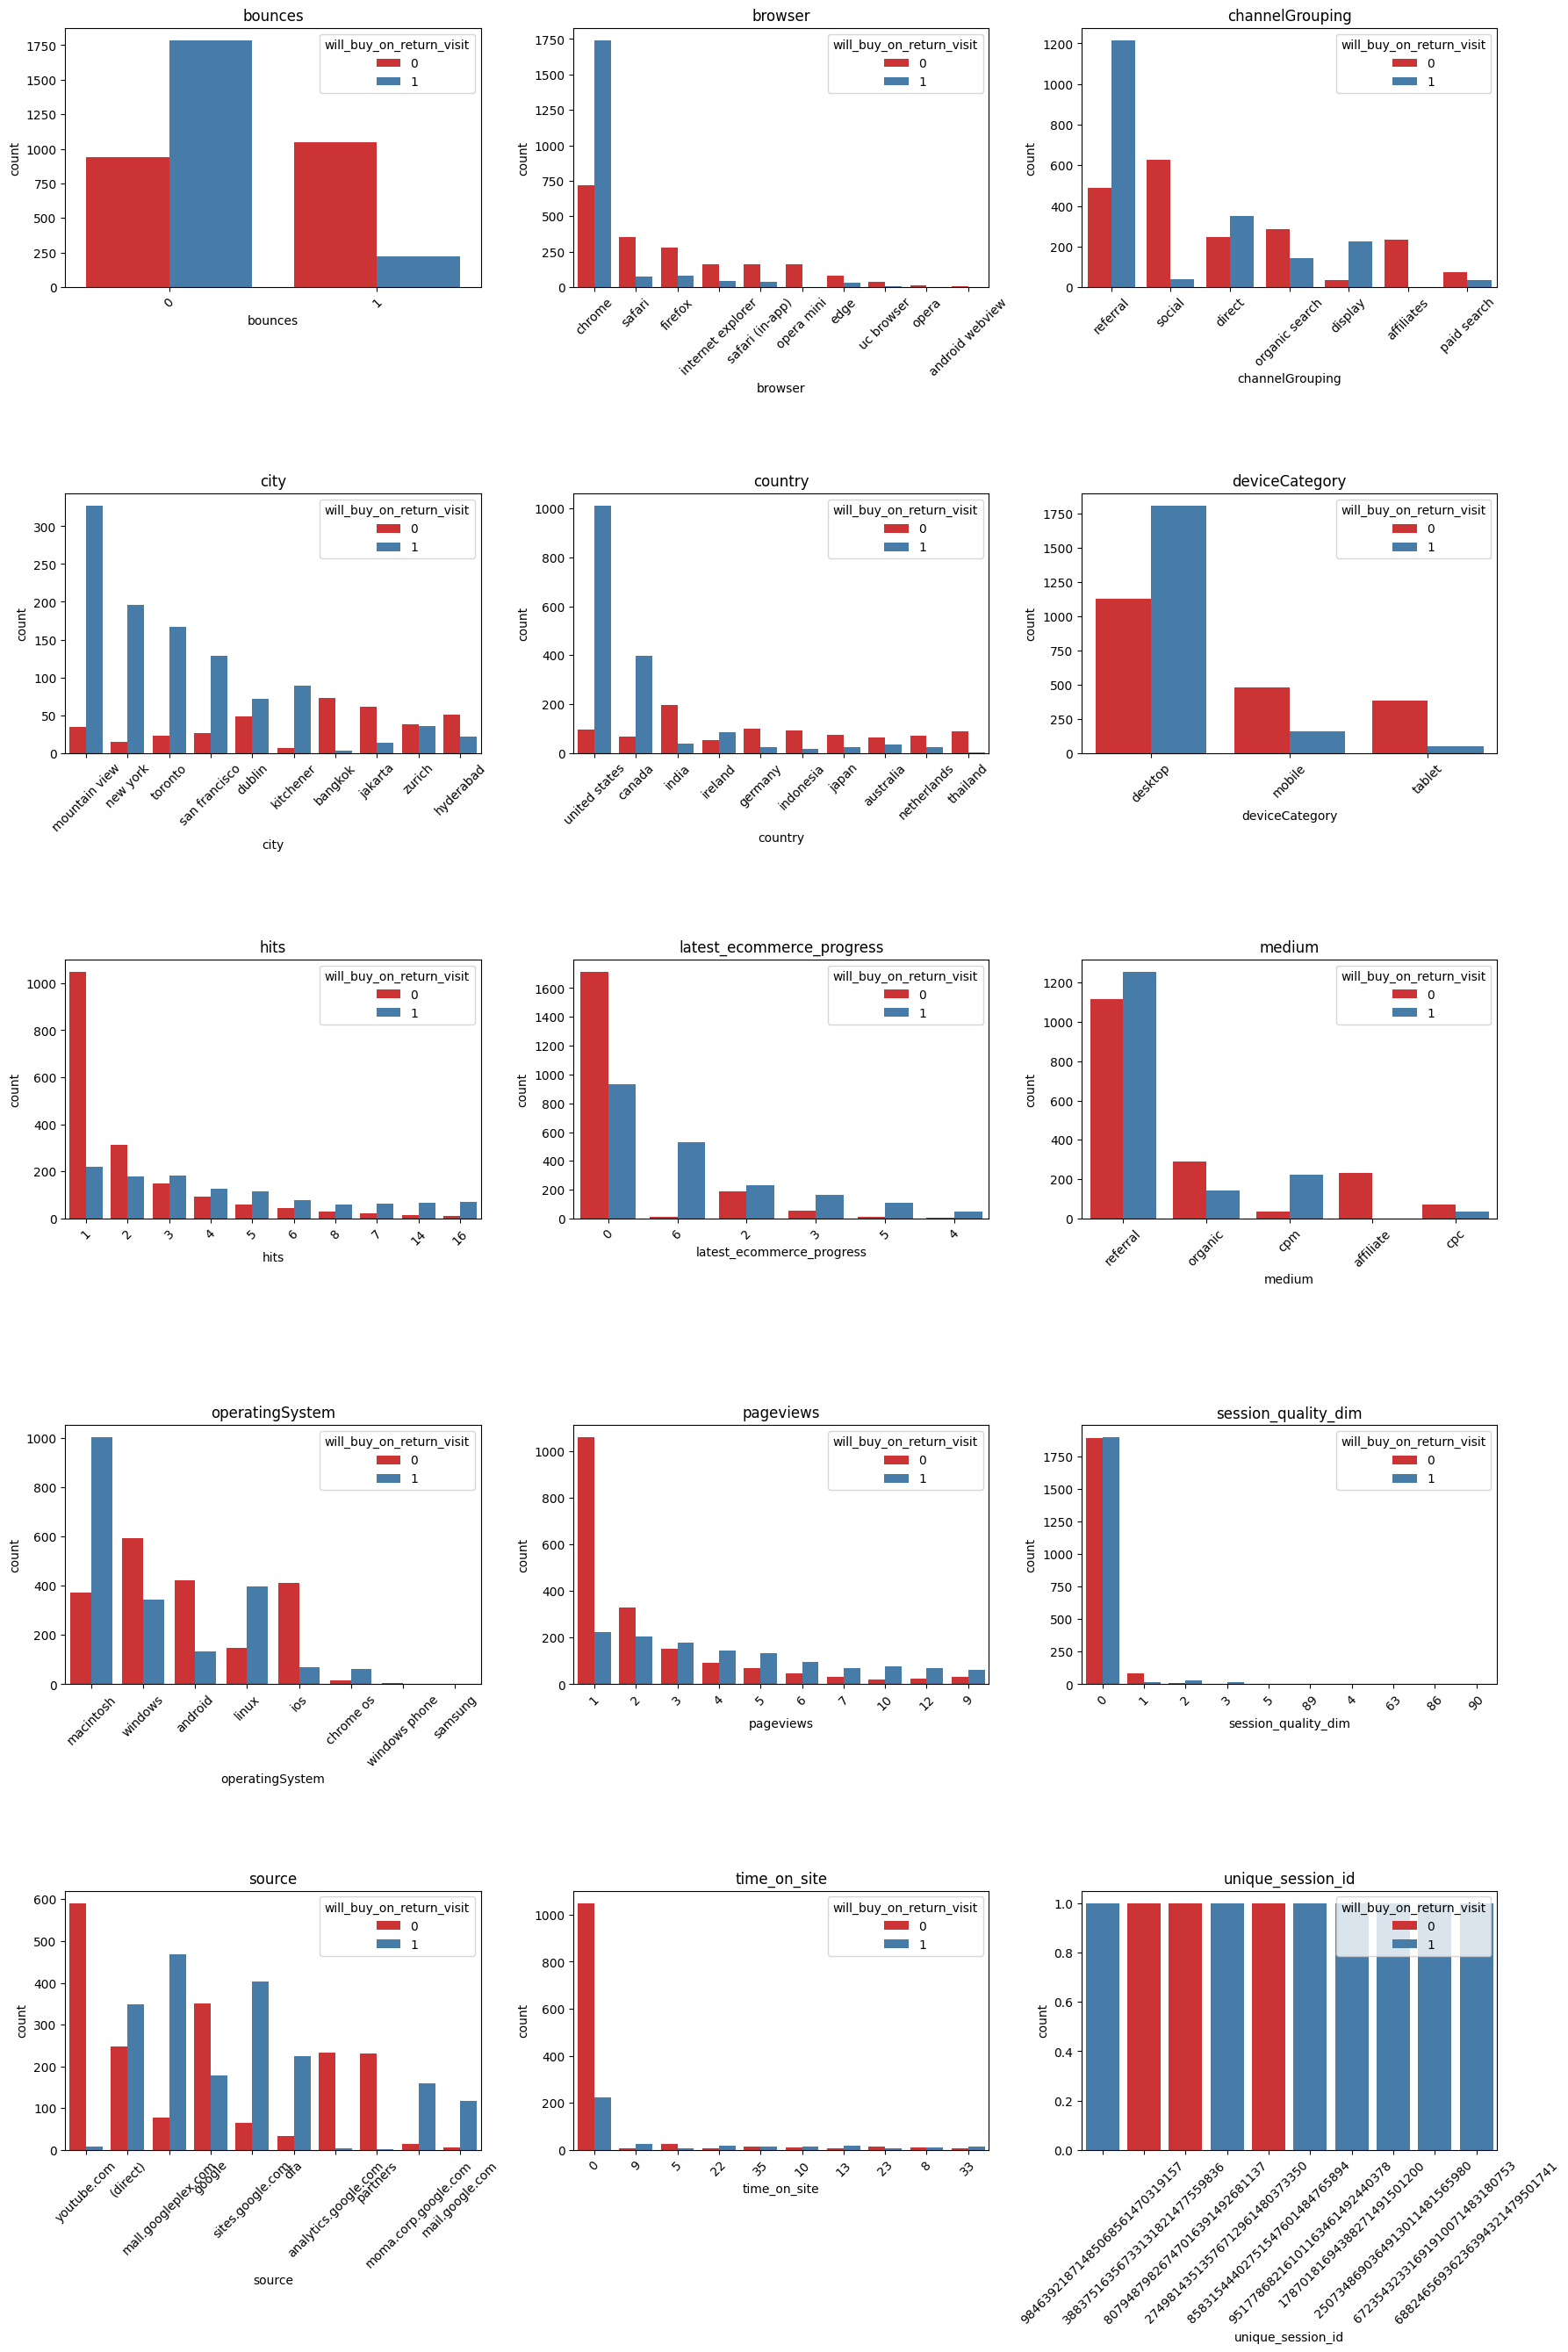

In [11]:
color_palette = sns.color_palette("Set1", len(obj_cols))

n_cols = 3
n_rows = (len(obj_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(obj_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = df[column].value_counts().nlargest(10).index
    
    filtered_df = df[df[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items, hue='will_buy_on_return_visit')
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

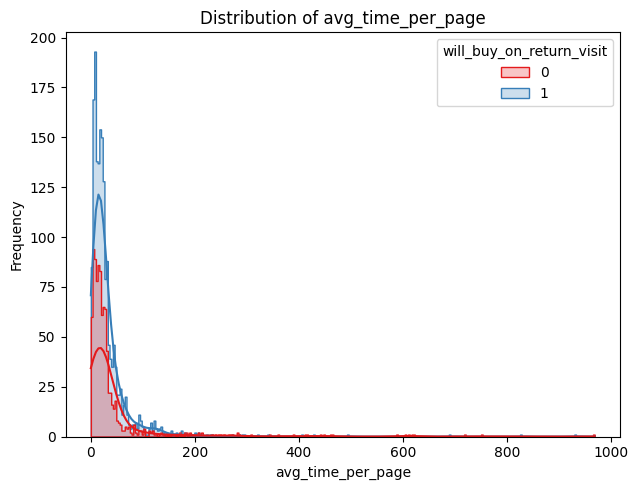

In [12]:
n_cols = 3
n_rows = (len(num_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=column, hue='will_buy_on_return_visit', kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

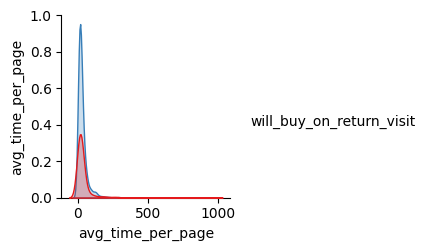

In [13]:
combined_df = pd.concat([df[num_cols], df['will_buy_on_return_visit']], axis=1)
sns.pairplot(combined_df, hue='will_buy_on_return_visit', palette='Set1')
plt.show()


In [ ]:
def feature_engineer(df):
    df = df.copy()

    # # Handle missing values
    # for col in df.select_dtypes(include='number'):
    #     df[col] = df[col].fillna(df[col].mean())

    # for col in df.select_dtypes(include='object'):
    #     df[col] = df[col].fillna('unknown')

    # # Feature: Total engagement
    # if all(x in df.columns for x in ['pageviews', 'hits', 'time_on_site']):
    #     df['engagement'] = df['pageviews'] + df['hits'] + df['time_on_site']

    # # Feature: Bounce indicator
    # if 'bounces' in df.columns:
    #     df['is_bounce'] = (df['bounces'] > 0).astype(int)

    # # Feature: Interaction term
    # if 'pageviews' in df.columns and 'avg_time_per_page' in df.columns:
    #     df['page_time_product'] = df['pageviews'] * df['avg_time_per_page'].fillna(0)

    # # Simplify 'source' and 'medium'
    # if 'source' in df.columns:
    #     df['source_simplified'] = df['source'].str.split('.').str[0]
    
    # if 'medium' in df.columns:
    #     df['medium'] = df['medium'].fillna('unknown')

    return df


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import optuna

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
train = df.copy()

X = train.drop(['id', 'will_buy_on_return_visit'], axis=1)
y = train['will_buy_on_return_visit']

random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [17]:
label_encoders = {}

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, stratify=y, random_state=random_state)


In [19]:
# cv_means_knn = []
# cv_std_knn = []
# k_values = range(5, 101)  # Searching k from 5 to 100

# # Loop over different k values for KNN
# for k in k_values:
#     # Create the pipeline for KNN
#     pipeline = make_pipeline(
#         KNNImputer(n_neighbors=k),  # KNN Imputer with different k values
#         StandardScaler(),
#         KNeighborsClassifier(n_neighbors=k)  # KNN Classifier with current k
#     )
    
#     # Cross-validation score
#     scores = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=kfold, n_jobs=4)
    
#     # Store results for each k
#     cv_means_knn.append(scores.mean())
#     cv_std_knn.append(scores.std())

# # Create a DataFrame to view the results
# cv_res_knn = pd.DataFrame({
#     "k": k_values,
#     "CrossValMeans": cv_means_knn,
#     "CrossValErrors": cv_std_knn
# })

# # Sort the results by CrossValMeans (accuracy) in descending order to find the best k
# best_k_result = cv_res_knn.sort_values(by='CrossValMeans', ascending=False).head(1)
# print(f"The best k for KNN is {best_k_result['k'].values[0]} with an accuracy of {best_k_result['CrossValMeans'].values[0]:.4f}")

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

# Daftar classifier
classifiers = [
    ("KNN", KNeighborsClassifier(n_neighbors=9)),
    ("GaussianNB", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=random_state)),
    ("Random Forest", RandomForestClassifier(random_state=random_state)),
    ("XGBoost", XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='error')),
]

# Menyimpan hasil cross-validation
cv_means = []
cv_std = []
algorithm_names = []

# Loop untuk cross-validation
for name, clf in classifiers:
    pipeline = make_pipeline(
        SimpleImputer(strategy="median"),  # Lebih universal
        StandardScaler(),
        clf
    )
    scores = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=kfold, n_jobs=4)
    cv_means.append(scores.mean())
    cv_std.append(scores.std())
    algorithm_names.append(name)

# Tabel hasil
cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValerrors": cv_std,
    "Algorithm": algorithm_names
})

# Urutkan dari yang terbaik
cv_res = cv_res.sort_values(by='CrossValMeans', ascending=False)
print(cv_res)


In [ ]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0),
        'random_state': random_state,
        'use_label_encoder': False,
        'eval_metric': 'error'
    }

    clf = XGBClassifier(**param)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2025-04-23 22:07:31,051] A new study created in memory with name: no-name-b13bc8a0-057a-418b-8570-0363dca8205d
[I 2025-04-23 22:08:23,940] Trial 0 finished with value: 0.9558610756186106 and parameters: {'n_estimators': 244, 'max_depth': 7, 'learning_rate': 0.2803570815744861, 'subsample': 0.8298975081689803, 'colsample_bytree': 0.7209044537806872, 'gamma': 0.38089414878348576, 'reg_alpha': 0.32084510528139987, 'reg_lambda': 0.17552898788338378}. Best is trial 0 with value: 0.9558610756186106.
[W 2025-04-23 22:08:40,545] Trial 1 failed with parameters: {'n_estimators': 197, 'max_depth': 3, 'learning_rate': 0.11104212026263716, 'subsample': 0.6578376096145281, 'colsample_bytree': 0.7988913590159358, 'gamma': 0.07639113581827517, 'reg_alpha': 0.003504865769734855, 'reg_lambda': 0.6326266787592403} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize

KeyboardInterrupt: 

In [84]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 244, 'max_depth': 7, 'learning_rate': 0.2803570815744861, 'subsample': 0.8298975081689803, 'colsample_bytree': 0.7209044537806872, 'gamma': 0.38089414878348576, 'reg_alpha': 0.32084510528139987, 'reg_lambda': 0.17552898788338378}


In [ ]:
clf = XGBClassifier(
    **best_params,
    random_state=random_state,
    use_label_encoder=False,
    eval_metric='error'
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Val Accuracy:', score)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Val Accuracy: 0.8928571428571429


0       98463921871485068561470319157
1       64969931561991723631486389718
2        2117346273301973411473489944
3        8934726040229318731481512421
4        5054831196771327751486859045
                    ...              
3995    97935044993066181501482069964
3996    50367472411835115651495891843
3997     2079573967163814741473478241
3998    09127428276670369691481539217
3999     1865544742288840731479888378
Name: unique_session_id, Length: 4000, dtype: object

In [ ]:
test = pd.read_csv('D:/Thopaz/Kuliah/ML/hands-on-2-pembelajaran-mesin-2025/test.csv')
test_df = feature_engineer(test).drop('id', axis=1)

# Assuming test_df and label_encoders are already defined


for col, le in label_encoders.items():
    # Get a set of known values from the LabelEncoder
    known_values = set(le.classes_)

    # Find unknown values in the test data
    unknown_values = set(test_df[col].astype(str)) - known_values

    # If there are unknown values, handle them by either:
    # 1. Replacing with a numerical value outside the known range (e.g., -1)
    # Instead of -1, use 'unknown' to avoid conflict with existing labels
    if unknown_values:
        test_df.loc[test_df[col].astype(str).isin(unknown_values), col] = 'unknown'

    # Add the 'unknown' label to the LabelEncoder's classes if it's not already there
    if 'unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'unknown')

    # Now transform the data, it should handle unknown values gracefully
    test_df[col] = le.transform(test_df[col].astype(str))

Found 8 unknown categories in column 'source'
Found 1 unknown categories in column 'medium'
Found 6 unknown categories in column 'country'


⚠️ Added missing column 'channelGrouping' filled with 'unknown'
⚠️ Added missing column 'city' filled with 'unknown'
⚠️ Added missing column 'unique_session_id' filled with 'unknown'
⚠️ Added missing column 'operatingSystem' filled with 'unknown'
⚠️ Added missing column 'deviceCategory' filled with 'unknown'
🔍 Found 8 unknown categories in 'source': ['sdf.org', 'playmarket.google.com', 'l.<|system|>']...
🔍 Found 1 unknown categories in 'medium': ['(none)']...
🔍 Found 6 unknown categories in 'country': ['italia', 'paris', 'reunion']...


In [104]:
def align_test_features(train_columns, test_df):
    """
    Ensure test data has exactly the same features as training data
    in the same order.
    """
    # 1. Add missing columns with 0
    missing_cols = set(train_columns) - set(test_df.columns)
    for col in missing_cols:
        test_df[col] = 0
        print(f"⚠️ Added missing column '{col}' filled with 0")

    # 2. Remove extra columns
    extra_cols = set(test_df.columns) - set(train_columns)
    if extra_cols:
        print(f"⚠️ Removing extra columns: {extra_cols}")
        test_df = test_df[train_columns]

    # 3. Ensure correct order
    test_df = test_df[train_columns]
    
    return test_df

# Usage:
# Get the feature names the model was trained on
train_columns = clf.get_booster().feature_names

# Align test data features
test_df_aligned = align_test_features(train_columns, test_df_processed)

# Now predict
pred = clf.predict(test_df_aligned)

⚠️ Added missing column 'unique_session_id_56473910332031629461479228327' filled with 0
⚠️ Added missing column 'unique_session_id_41738126786640332491474776628' filled with 0
⚠️ Added missing column 'unique_session_id_41542267189312767791479166404' filled with 0
⚠️ Added missing column 'unique_session_id_74815100400842270241481177560' filled with 0
⚠️ Added missing column 'unique_session_id_24878516830030087121488294480' filled with 0
⚠️ Added missing column 'country_indiana' filled with 0
⚠️ Added missing column 'unique_session_id_93242654596352053101484093988' filled with 0
⚠️ Added missing column 'unique_session_id_14239184461978579031487283814' filled with 0
⚠️ Added missing column 'unique_session_id_59268634759612548921493785987' filled with 0
⚠️ Added missing column 'unique_session_id_58020816056734783761485810275' filled with 0
⚠️ Added missing column 'unique_session_id_59498868159341160141477532874' filled with 0
⚠️ Added missing column 'unique_session_id_001995070358937581114

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_rabat' filled with 0
⚠️ Added missing column 'country_czech republic' filled with 0
⚠️ Added missing column 'unique_session_id_80394557597695088921497289953' filled with 0
⚠️ Added missing column 'city_dhaka' filled with 0
⚠️ Added missing column 'unique_session_id_35560207239126662091492495940' filled with 0
⚠️ Added missing column 'unique_session_id_0967625948985562941482065059' filled with 0
⚠️ Added missing column 'unique_session_id_16552570845869670581477412031' filled with 0
⚠️ Added missing column 'unique_session_id_28397294818545368411481461830' filled with 0
⚠️ Added missing column 'unique_session_id_92377716899440961601471889338' filled with 0
⚠️ Added missing column 'unique_session_id_95092460503553717531490320945' filled with 0
⚠️ Added missing column 'unique_session_id_99330264280137386541482286116' filled with 0
⚠️ Added missing column 'unique_session_id_17516231928443868831485811207' filled with 0
⚠️ Added missing column 'unique_session_id_5

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_07800580826340100571480229563' filled with 0
⚠️ Added missing column 'unique_session_id_30894312032343790891488204210' filled with 0
⚠️ Added missing column 'unique_session_id_07115837260316975811498971990' filled with 0
⚠️ Added missing column 'unique_session_id_88778085121587114871481459973' filled with 0
⚠️ Added missing column 'country_ireland' filled with 0
⚠️ Added missing column 'unique_session_id_70987430172703404951473473222' filled with 0
⚠️ Added missing column 'unique_session_id_02601808156311959521475167155' filled with 0
⚠️ Added missing column 'unique_session_id_04512848311394524681483235932' filled with 0
⚠️ Added missing column 'unique_session_id_25758258807066668731486365306' filled with 0
⚠️ Added missing column 'unique_session_id_0881015410215432551476269860' filled with 0
⚠️ Added missing column 'unique_session_id_43730337055071877001500147444' filled with 0
⚠️ Added missing column 'unique_session_id_6767091283561431341147

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_84196605741473511051485769331' filled with 0
⚠️ Added missing column 'unique_session_id_63244868806546418581480140763' filled with 0
⚠️ Added missing column 'unique_session_id_86543399554542593501494064384' filled with 0
⚠️ Added missing column 'unique_session_id_8972329601901024241494694360' filled with 0
⚠️ Added missing column 'unique_session_id_79684670921941930411497077127' filled with 0
⚠️ Added missing column 'city_ciamis' filled with 0
⚠️ Added missing column 'unique_session_id_07072590489960317771479198973' filled with 0
⚠️ Added missing column 'unique_session_id_99339796867880348591482666144' filled with 0
⚠️ Added missing column 'unique_session_id_97340421495248741041480972465' filled with 0
⚠️ Added missing column 'city_baghdad' filled with 0
⚠️ Added missing column 'unique_session_id_88072064685853777391488205752' filled with 0
⚠️ Added missing column 'unique_session_id_57419109005395177361493132421' filled with 0
⚠️ Added missing

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_99090886258111483001471551786' filled with 0
⚠️ Added missing column 'unique_session_id_95908266232404030751494969061' filled with 0
⚠️ Added missing column 'unique_session_id_60957610477383523061484391589' filled with 0
⚠️ Added missing column 'unique_session_id_66960793746971467431489573341' filled with 0
⚠️ Added missing column 'unique_session_id_69897523102209575561482591982' filled with 0
⚠️ Added missing column 'unique_session_id_88889631039002065021474717978' filled with 0
⚠️ Added missing column 'unique_session_id_53872104159034343961495880467' filled with 0
⚠️ Added missing column 'unique_session_id_66207108342136491231471391988' filled with 0
⚠️ Added missing column 'unique_session_id_20461782879618285031492101115' filled with 0
⚠️ Added missing column 'unique_session_id_86967699305536303361480450452' filled with 0
⚠️ Added missing column 'unique_session_id_80104810261214288681491007054' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'source_dnglss.com' filled with 0
⚠️ Added missing column 'unique_session_id_98463921871485068561470319157' filled with 0
⚠️ Added missing column 'unique_session_id_0299180161856116621482210111' filled with 0
⚠️ Added missing column 'unique_session_id_32726617661826834471481910835' filled with 0
⚠️ Added missing column 'unique_session_id_25017874277485014021481712408' filled with 0
⚠️ Added missing column 'unique_session_id_45231489413195561481481281731' filled with 0
⚠️ Added missing column 'city_acapulco' filled with 0
⚠️ Added missing column 'unique_session_id_25314008593473383101498146042' filled with 0
⚠️ Added missing column 'unique_session_id_64002514187523337391474703938' filled with 0
⚠️ Added missing column 'unique_session_id_38975112400670549701498124965' filled with 0
⚠️ Added missing column 'unique_session_id_81067052633784773371481893943' filled with 0
⚠️ Added missing column 'unique_session_id_97653196325649359511479957570' filled with 0
⚠️ Added 

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_79635676259448933701484171839' filled with 0
⚠️ Added missing column 'unique_session_id_68262626792759196861490745728' filled with 0
⚠️ Added missing column 'unique_session_id_82190616536282547511487393471' filled with 0
⚠️ Added missing column 'unique_session_id_16522808440986570101470032577' filled with 0
⚠️ Added missing column 'unique_session_id_67514228846032453611474946653' filled with 0
⚠️ Added missing column 'unique_session_id_6870904953007330941489289867' filled with 0
⚠️ Added missing column 'unique_session_id_55515703934498086091494888218' filled with 0
⚠️ Added missing column 'unique_session_id_00250032750820229161487943025' filled with 0
⚠️ Added missing column 'unique_session_id_8129697331482676261487549280' filled with 0
⚠️ Added missing column 'unique_session_id_09959906622390927001476397115' filled with 0
⚠️ Added missing column 'unique_session_id_96479886290645555671486975768' filled with 0
⚠️ Added missing column 'country_j

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_49845168885937257761475007745' filled with 0
⚠️ Added missing column 'country_burkina faso' filled with 0
⚠️ Added missing column 'unique_session_id_33687391731118904601481212409' filled with 0
⚠️ Added missing column 'unique_session_id_64441981101292177141498247161' filled with 0
⚠️ Added missing column 'unique_session_id_64311830935346222691488342339' filled with 0
⚠️ Added missing column 'source_youtube.com' filled with 0
⚠️ Added missing column 'unique_session_id_77532156459077964741493426313' filled with 0
⚠️ Added missing column 'unique_session_id_86243524633925728961481110028' filled with 0
⚠️ Added missing column 'unique_session_id_2496285464274022461493673984' filled with 0
⚠️ Added missing column 'unique_session_id_64654762336958064891477321022' filled with 0
⚠️ Added missing column 'unique_session_id_34180634067626058311495450891' filled with 0
⚠️ Added missing column 'unique_session_id_23567882269150351461488750754' filled with 0
⚠

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_62785562616445607271498710411' filled with 0
⚠️ Added missing column 'unique_session_id_13219329357828330541474434635' filled with 0
⚠️ Added missing column 'unique_session_id_13604481761236014981480712801' filled with 0
⚠️ Added missing column 'unique_session_id_68316855957745343141478225555' filled with 0
⚠️ Added missing column 'unique_session_id_14511674100752548401473283039' filled with 0
⚠️ Added missing column 'unique_session_id_27735684739451759581471770272' filled with 0
⚠️ Added missing column 'country_ecuador' filled with 0
⚠️ Added missing column 'unique_session_id_08137961981044148941476834351' filled with 0
⚠️ Added missing column 'unique_session_id_70022654976926166241478223259' filled with 0
⚠️ Added missing column 'unique_session_id_7745927870069014991474403833' filled with 0
⚠️ Added missing column 'unique_session_id_86385198629063050891483349566' filled with 0
⚠️ Added missing column 'unique_session_id_5455015562796269286147

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_93206053976559781311492193585' filled with 0
⚠️ Added missing column 'unique_session_id_9345860792268880381481763999' filled with 0
⚠️ Added missing column 'unique_session_id_3439746015175518951481292672' filled with 0
⚠️ Added missing column 'unique_session_id_97258061790088082581487642654' filled with 0
⚠️ Added missing column 'unique_session_id_93194508262292931761479376216' filled with 0
⚠️ Added missing column 'city_campinas' filled with 0
⚠️ Added missing column 'unique_session_id_65987658533449091301480648683' filled with 0
⚠️ Added missing column 'city_sao paulo' filled with 0
⚠️ Added missing column 'unique_session_id_38320043718572500651474425213' filled with 0
⚠️ Added missing column 'unique_session_id_10669641936362943211481159843' filled with 0
⚠️ Added missing column 'deviceCategory_tablet' filled with 0
⚠️ Added missing column 'unique_session_id_4532530861796738391478245209' filled with 0
⚠️ Added missing column 'unique_session_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_12998636107800095851476202761' filled with 0
⚠️ Added missing column 'unique_session_id_6153512517184178201480107830' filled with 0
⚠️ Added missing column 'unique_session_id_41269113876821355471489551410' filled with 0
⚠️ Added missing column 'unique_session_id_40275887230028727311485983580' filled with 0
⚠️ Added missing column 'unique_session_id_1425737892335032431484881265' filled with 0
⚠️ Added missing column 'unique_session_id_24636254133665857521490344054' filled with 0
⚠️ Added missing column 'unique_session_id_54152514796300538511489252526' filled with 0
⚠️ Added missing column 'unique_session_id_9384256702056803461479393513' filled with 0
⚠️ Added missing column 'unique_session_id_29359526925616933881484868380' filled with 0
⚠️ Added missing column 'unique_session_id_51527624102745429981481264791' filled with 0
⚠️ Added missing column 'unique_session_id_97699003172668310301482734418' filled with 0
⚠️ Added missing column 'unique_ses

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_87058604725981297311482993422' filled with 0
⚠️ Added missing column 'unique_session_id_06093429552109499501484754208' filled with 0
⚠️ Added missing column 'unique_session_id_97793329560081195931501379685' filled with 0
⚠️ Added missing column 'unique_session_id_6341820743571784811494653752' filled with 0
⚠️ Added missing column 'unique_session_id_39444607715175413641495247255' filled with 0
⚠️ Added missing column 'unique_session_id_47656366552232679621481929580' filled with 0
⚠️ Added missing column 'unique_session_id_92651012144571120411485961468' filled with 0
⚠️ Added missing column 'unique_session_id_05731268153991437921495030732' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_42693638907744717471484003251' filled with 0
⚠️ Added missing column 'unique_session_id_14711627153045484871488118515' filled with 0
⚠️ Added missing column 'unique_session_id_36207680075501807991481596296' filled with 0
⚠️ Added missing column 'unique_session_id_1085587897263192121488087236' filled with 0
⚠️ Added missing column 'unique_session_id_07840003835420278181481568731' filled with 0
⚠️ Added missing column 'unique_session_id_16026021198934246341485380355' filled with 0
⚠️ Added missing column 'unique_session_id_6793420361103136321482441684' filled with 0
⚠️ Added missing column 'unique_session_id_39730309229360499031489534159' filled with 0
⚠️ Added missing column 'unique_session_id_8753402.36225132148996162151496133269' filled with 0
⚠️ Added missing column 'unique_session_id_56230813869334216151492213717' filled with 0
⚠️ Added missing column 'unique_session_id_31080198896647412651486353646' filled with 0
⚠️ Added missing column 'u

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_98243428003077498751491541783' filled with 0
⚠️ Added missing column 'unique_session_id_04369448421516340701483487505' filled with 0
⚠️ Added missing column 'unique_session_id_074974310463879061476386300' filled with 0
⚠️ Added missing column 'unique_session_id_73189612277047267381480372455' filled with 0
⚠️ Added missing column 'unique_session_id_62312213139561829891471839605' filled with 0
⚠️ Added missing column 'unique_session_id_78883378703169529521499349235' filled with 0
⚠️ Added missing column 'city_moscow' filled with 0
⚠️ Added missing column 'city_dublin' filled with 0
⚠️ Added missing column 'unique_session_id_61984699904966323961482202430' filled with 0
⚠️ Added missing column 'country_saudi arabia' filled with 0
⚠️ Added missing column 'unique_session_id_179352722973989791495036094' filled with 0
⚠️ Added missing column 'unique_session_id_39231551307688922141493849852' filled with 0
⚠️ Added missing column 'country_portugal' fill

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_42532633937104437361489611152' filled with 0
⚠️ Added missing column 'unique_session_id_37320923594010647501473875934' filled with 0
⚠️ Added missing column 'unique_session_id_67842627231679724001480353915' filled with 0
⚠️ Added missing column 'unique_session_id_72508068676369238761479869817' filled with 0
⚠️ Added missing column 'unique_session_id_95406749355121610771482869261' filled with 0
⚠️ Added missing column 'unique_session_id_66978721036866102131494541812' filled with 0
⚠️ Added missing column 'unique_session_id_45899480909184951821479294941' filled with 0
⚠️ Added missing column 'unique_session_id_10297876687503200131482915596' filled with 0
⚠️ Added missing column 'unique_session_id_74455957187624832111484570364' filled with 0
⚠️ Added missing column 'city_tel aviv-yafo' filled with 0
⚠️ Added missing column 'unique_session_id_15088741248013241141471868512' filled with 0
⚠️ Added missing column 'unique_session_id_471691202386889872

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_63050174552641710881484092688' filled with 0
⚠️ Added missing column 'unique_session_id_12590676953388500401478564908' filled with 0
⚠️ Added missing column 'unique_session_id_18392998480580604621495204320' filled with 0
⚠️ Added missing column 'country_russia' filled with 0
⚠️ Added missing column 'unique_session_id_82238656616933666241488221550' filled with 0
⚠️ Added missing column 'unique_session_id_4753177852719472071479892649' filled with 0
⚠️ Added missing column 'unique_session_id_5385791983685040121487614563' filled with 0
⚠️ Added missing column 'unique_session_id_54137777205124513411472306781' filled with 0
⚠️ Added missing column 'unique_session_id_87443965582527154681479863760' filled with 0
⚠️ Added missing column 'city_kuala lumpur' filled with 0
⚠️ Added missing column 'unique_session_id_85120799951803524251473661668' filled with 0
⚠️ Added missing column 'unique_session_id_24716742025380210391473156298' filled with 0
⚠️ Added 

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_1869068107171309651478393025' filled with 0
⚠️ Added missing column 'city_singapour city' filled with 0
⚠️ Added missing column 'unique_session_id_45458737321105170931491218552' filled with 0
⚠️ Added missing column 'unique_session_id_57897758337933257661479282954' filled with 0
⚠️ Added missing column 'unique_session_id_3795342635376713381475125998' filled with 0
⚠️ Added missing column 'unique_session_id_41992869202217595821484009979' filled with 0
⚠️ Added missing column 'city_kingdom of saudi arabia' filled with 0
⚠️ Added missing column 'unique_session_id_62687782582333315351492193681' filled with 0
⚠️ Added missing column 'unique_session_id_69201299532848469061476104987' filled with 0
⚠️ Added missing column 'unique_session_id_44169810405526318871471616781' filled with 0
⚠️ Added missing column 'unique_session_id_84736532603571278461482416875' filled with 0
⚠️ Added missing column 'unique_session_id_27346018837504266291501123100' filled 

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_74198783586334879631500812512' filled with 0
⚠️ Added missing column 'source_plus.urlshorts.com' filled with 0
⚠️ Added missing column 'country_nepal' filled with 0
⚠️ Added missing column 'unique_session_id_97442140867658561261496883947' filled with 0
⚠️ Added missing column 'unique_session_id_64098853439047886551470965786' filled with 0
⚠️ Added missing column 'unique_session_id_57701536126502105641484637170' filled with 0
⚠️ Added missing column 'unique_session_id_29704615339379952001487394009' filled with 0
⚠️ Added missing column 'unique_session_id_27267296963589917041488568077' filled with 0
⚠️ Added missing column 'unique_session_id_05760612451624927071497232334' filled with 0
⚠️ Added missing column 'unique_session_id_53771601832647060241487091925' filled with 0
⚠️ Added missing column 'unique_session_id_55355824205837077731500565959' filled with 0
⚠️ Added missing column 'unique_session_id_54769233974639437521477179609' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_48038915535859706671494727769' filled with 0
⚠️ Added missing column 'unique_session_id_70622163830704876571474683036' filled with 0
⚠️ Added missing column 'unique_session_id_5710890398828285021470942558' filled with 0
⚠️ Added missing column 'city_florianópolis' filled with 0
⚠️ Added missing column 'unique_session_id_85470099031063488021479878663' filled with 0
⚠️ Added missing column 'unique_session_id_59211766943112647411480200719' filled with 0
⚠️ Added missing column 'unique_session_id_69949765806534122901489154571' filled with 0
⚠️ Added missing column 'unique_session_id_45416608061006530591470522467' filled with 0
⚠️ Added missing column 'unique_session_id_84857723313067434651477349403' filled with 0
⚠️ Added missing column 'unique_session_id_37596019448635374501495152576' filled with 0
⚠️ Added missing column 'unique_session_id_22244717774597711471478826020' filled with 0
⚠️ Added missing column 'unique_session_id_8443990808571782570

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_97416185971746521611470937478' filled with 0
⚠️ Added missing column 'unique_session_id_88775546365484538151493659881' filled with 0
⚠️ Added missing column 'unique_session_id_14729256346189325291477409543' filled with 0
⚠️ Added missing column 'unique_session_id_804206324450712081489262529' filled with 0
⚠️ Added missing column 'city_ashdod' filled with 0
⚠️ Added missing column 'unique_session_id_66902922736233791201491218187' filled with 0
⚠️ Added missing column 'unique_session_id_99178871905514528331497496432' filled with 0
⚠️ Added missing column 'unique_session_id_42079884381449168091496553926' filled with 0
⚠️ Added missing column 'unique_session_id_35087140427791500361472368176' filled with 0
⚠️ Added missing column 'unique_session_id_64614737832220817301488798751' filled with 0
⚠️ Added missing column 'country_norway' filled with 0
⚠️ Added missing column 'unique_session_id_05251212486562476451485912905' filled with 0
⚠️ Added missin

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_02348909452715882951499734604' filled with 0
⚠️ Added missing column 'unique_session_id_203133627543962981480475046' filled with 0
⚠️ Added missing column 'unique_session_id_6228791174933800781485003181' filled with 0
⚠️ Added missing column 'unique_session_id_74277514246462869191476197503' filled with 0
⚠️ Added missing column 'unique_session_id_54939523199288060111484251883' filled with 0
⚠️ Added missing column 'unique_session_id_58206300662359704021481629645' filled with 0
⚠️ Added missing column 'country_nigeria' filled with 0
⚠️ Added missing column 'unique_session_id_98957540276668044141484167815' filled with 0
⚠️ Added missing column 'unique_session_id_42704210916323431511480944522' filled with 0
⚠️ Added missing column 'unique_session_id_81348472714939286851481308550' filled with 0
⚠️ Added missing column 'unique_session_id_66788876072231246861498694801' filled with 0
⚠️ Added missing column 'unique_session_id_496652774494378536814914

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_89636385811092057121487148804' filled with 0
⚠️ Added missing column 'unique_session_id_36804658619592979531480594393' filled with 0
⚠️ Added missing column 'unique_session_id_71011850980326194871479382403' filled with 0
⚠️ Added missing column 'unique_session_id_46773148205679915101475080607' filled with 0
⚠️ Added missing column 'unique_session_id_45851378678239504191488930762' filled with 0
⚠️ Added missing column 'unique_session_id_96163899280504045161495274735' filled with 0
⚠️ Added missing column 'unique_session_id_89068713361973124471491353826' filled with 0
⚠️ Added missing column 'unique_session_id_99829235256373304661486621478' filled with 0
⚠️ Added missing column 'unique_session_id_62939601101648995671499401641' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_68868018717021955181485868854' filled with 0
⚠️ Added missing column 'unique_session_id_47177150195752309331476108632' filled with 0
⚠️ Added missing column 'unique_session_id_2117346273301973411473489944' filled with 0
⚠️ Added missing column 'unique_session_id_53286922680194842131477097581' filled with 0
⚠️ Added missing column 'unique_session_id_06111813008843050591478898812' filled with 0
⚠️ Added missing column 'unique_session_id_08889180428925342531473664638' filled with 0
⚠️ Added missing column 'unique_session_id_41016034983521038961499934375' filled with 0
⚠️ Added missing column 'unique_session_id_19648369365877605381479707544' filled with 0
⚠️ Added missing column 'city_dnipropetrovsk' filled with 0
⚠️ Added missing column 'source_lunevents.corp.google.com' filled with 0
⚠️ Added missing column 'unique_session_id_39295969122365158461480917816' filled with 0
⚠️ Added missing column 'unique_session_id_88872044197414202881472838251' fi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'source_dealspotr.com' filled with 0
⚠️ Added missing column 'unique_session_id_86172513888746161731487461956' filled with 0
⚠️ Added missing column 'unique_session_id_49802305321234064911498124155' filled with 0
⚠️ Added missing column 'unique_session_id_87975563130437584261488297911' filled with 0
⚠️ Added missing column 'unique_session_id_43018089431874481941487852166' filled with 0
⚠️ Added missing column 'unique_session_id_58642503254274133391491579589' filled with 0
⚠️ Added missing column 'unique_session_id_03957374071551693461490273386' filled with 0
⚠️ Added missing column 'unique_session_id_88718215213475338591487551535' filled with 0
⚠️ Added missing column 'unique_session_id_06947750301551752511480266653' filled with 0
⚠️ Added missing column 'unique_session_id_20461756096731948021479835081' filled with 0
⚠️ Added missing column 'unique_session_id_48579512199111113871482857433' filled with 0
⚠️ Added missing column 'unique_session_id_7958366871420863

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_27741017399895352891490585971' filled with 0
⚠️ Added missing column 'unique_session_id_76073355619094825101499229995' filled with 0
⚠️ Added missing column 'unique_session_id_4801188864874665511471567739' filled with 0
⚠️ Added missing column 'unique_session_id_52729900198958683921477295972' filled with 0
⚠️ Added missing column 'unique_session_id_09233389519555494881490841193' filled with 0
⚠️ Added missing column 'unique_session_id_0808713721321970961478895442' filled with 0
⚠️ Added missing column 'unique_session_id_21177373180613083241489914799' filled with 0
⚠️ Added missing column 'unique_session_id_65689941722819088501497917549' filled with 0
⚠️ Added missing column 'unique_session_id_84978510658716109731481821853' filled with 0
⚠️ Added missing column 'unique_session_id_85754633792858895371497605653' filled with 0
⚠️ Added missing column 'unique_session_id_48162858243890142151492659582' filled with 0
⚠️ Added missing column 'unique_se

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_24095499286496298891473195956' filled with 0
⚠️ Added missing column 'unique_session_id_96238547229393541221489502615' filled with 0
⚠️ Added missing column 'unique_session_id_46186877809879703971500334604' filled with 0
⚠️ Added missing column 'unique_session_id_66293625983327181351497584717' filled with 0
⚠️ Added missing column 'unique_session_id_19765700858633160111494151757' filled with 0
⚠️ Added missing column 'unique_session_id_61819895185538600521486290885' filled with 0
⚠️ Added missing column 'unique_session_id_63179816442697779091480544210' filled with 0
⚠️ Added missing column 'unique_session_id_85438526850209221991475495449' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'operatingSystem_windows' filled with 0
⚠️ Added missing column 'unique_session_id_24193782718566177021493185932' filled with 0
⚠️ Added missing column 'unique_session_id_04048918395829994561482024604' filled with 0
⚠️ Added missing column 'unique_session_id_98632462766062482331492633592' filled with 0
⚠️ Added missing column 'city_berkeley' filled with 0
⚠️ Added missing column 'unique_session_id_70925203209127340701479482310' filled with 0
⚠️ Added missing column 'unique_session_id_90925396438443473761479177022' filled with 0
⚠️ Added missing column 'unique_session_id_45678672300688867741496613854' filled with 0
⚠️ Added missing column 'unique_session_id_45918520421263002971494980524' filled with 0
⚠️ Added missing column 'unique_session_id_57614482752206669261483562761' filled with 0
⚠️ Added missing column 'unique_session_id_34698545481266762211497981503' filled with 0
⚠️ Added missing column 'unique_session_id_17082123261317555141480246644' filled with 0
⚠️

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_7510429266575453531490460874' filled with 0
⚠️ Added missing column 'operatingSystem_linux' filled with 0
⚠️ Added missing column 'unique_session_id_73666904037370762521492925913' filled with 0
⚠️ Added missing column 'source_baids.net' filled with 0
⚠️ Added missing column 'unique_session_id_15941098058570679141485038580' filled with 0
⚠️ Added missing column 'city_tehran' filled with 0
⚠️ Added missing column 'city_kirkby's cross' filled with 0
⚠️ Added missing column 'unique_session_id_36548782535417206341491473248' filled with 0
⚠️ Added missing column 'unique_session_id_86306475125808260921480695697' filled with 0
⚠️ Added missing column 'unique_session_id_7240207902586669251482108356' filled with 0
⚠️ Added missing column 'unique_session_id_29848468925889131861479405631' filled with 0
⚠️ Added missing column 'unique_session_id_79140663053745399761497175444' filled with 0
⚠️ Added missing column 'unique_session_id_736425786897938718914760

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_ashburn' filled with 0
⚠️ Added missing column 'unique_session_id_67234871813887882281491180654' filled with 0
⚠️ Added missing column 'unique_session_id_63311917787597694441478133214' filled with 0
⚠️ Added missing column 'unique_session_id_68099137137764548401496959655' filled with 0
⚠️ Added missing column 'unique_session_id_09446673174756746281494671064' filled with 0
⚠️ Added missing column 'unique_session_id_74090222525971050131476781345' filled with 0
⚠️ Added missing column 'unique_session_id_95372878680769910891489738576' filled with 0
⚠️ Added missing column 'unique_session_id_10764364650723632551492782742' filled with 0
⚠️ Added missing column 'unique_session_id_73332498606467008051491173202' filled with 0
⚠️ Added missing column 'country_fiji' filled with 0
⚠️ Added missing column 'city_dutchess county' filled with 0
⚠️ Added missing column 'unique_session_id_61830802516106192031479460735' filled with 0
⚠️ Added missing column 'city_zurich' fil

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_54579378939617869041478171710' filled with 0
⚠️ Added missing column 'unique_session_id_83964177561686419291470601069' filled with 0
⚠️ Added missing column 'unique_session_id_50442878985270565561501319644' filled with 0
⚠️ Added missing column 'unique_session_id_04998680642966645921488050051' filled with 0
⚠️ Added missing column 'unique_session_id_35649523451029571231498392809' filled with 0
⚠️ Added missing column 'unique_session_id_80723586054233445661478574278' filled with 0
⚠️ Added missing column 'unique_session_id_49286365929522866181480439989' filled with 0
⚠️ Added missing column 'unique_session_id_79306215730964736401477116869' filled with 0
⚠️ Added missing column 'unique_session_id_98350586114629847861495124310' filled with 0
⚠️ Added missing column 'unique_session_id_69643818239954221871488318654' filled with 0
⚠️ Added missing column 'unique_session_id_06294486635461071441489720097' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_73425082980078042041474406203' filled with 0
⚠️ Added missing column 'unique_session_id_70430167444656041081493608057' filled with 0
⚠️ Added missing column 'unique_session_id_48577124315260744801473161031' filled with 0
⚠️ Added missing column 'unique_session_id_96070209237091166921486048230' filled with 0
⚠️ Added missing column 'unique_session_id_28314210891222835391486926642' filled with 0
⚠️ Added missing column 'unique_session_id_61166394092678125571485159213' filled with 0
⚠️ Added missing column 'city_san jose' filled with 0
⚠️ Added missing column 'unique_session_id_07533689369456720261489289815' filled with 0
⚠️ Added missing column 'unique_session_id_3874954055127737941492163867' filled with 0
⚠️ Added missing column 'city_caernarvon' filled with 0
⚠️ Added missing column 'unique_session_id_86934385972532872041482214301' filled with 0
⚠️ Added missing column 'unique_session_id_03050614052387812551480051847' filled with 0
⚠️ Added mi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_85908421020897771881493689905' filled with 0
⚠️ Added missing column 'unique_session_id_64745832222894240551478821953' filled with 0
⚠️ Added missing column 'unique_session_id_38599503612845050771481310021' filled with 0
⚠️ Added missing column 'unique_session_id_14981200127411932131477501807' filled with 0
⚠️ Added missing column 'unique_session_id_41756082632744392271498133917' filled with 0
⚠️ Added missing column 'unique_session_id_4974855256104622551495618584' filled with 0
⚠️ Added missing column 'unique_session_id_71453199867116330111498631801' filled with 0
⚠️ Added missing column 'unique_session_id_24432294281610525181472420428' filled with 0
⚠️ Added missing column 'unique_session_id_38597928506958296351477224095' filled with 0
⚠️ Added missing column 'unique_session_id_15517503780204799961475495548' filled with 0
⚠️ Added missing column 'unique_session_id_43202697348386891221497403185' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_96216852798230508781492566344' filled with 0
⚠️ Added missing column 'unique_session_id_18197170013783872461500245751' filled with 0
⚠️ Added missing column 'unique_session_id_26004046651881558621470298087' filled with 0
⚠️ Added missing column 'unique_session_id_53476011329802857651485972884' filled with 0
⚠️ Added missing column 'unique_session_id_89679908761947286661479482189' filled with 0
⚠️ Added missing column 'unique_session_id_12396664505789805901477260674' filled with 0
⚠️ Added missing column 'unique_session_id_57431536572652247501495698227' filled with 0
⚠️ Added missing column 'unique_session_id_54168154709923563131489922918' filled with 0
⚠️ Added missing column 'unique_session_id_17920916365365238701480977534' filled with 0
⚠️ Added missing column 'unique_session_id_24519210336206022621480863633' filled with 0
⚠️ Added missing column 'unique_session_id_69896961009402468931474406446' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_montreal' filled with 0
⚠️ Added missing column 'unique_session_id_43315021624194558701475934993' filled with 0
⚠️ Added missing column 'unique_session_id_36338706331685752981490210344' filled with 0
⚠️ Added missing column 'unique_session_id_92845999141402321251481322508' filled with 0
⚠️ Added missing column 'unique_session_id_41392551759437995951482141892' filled with 0
⚠️ Added missing column 'unique_session_id_13946627123047092961486694539' filled with 0
⚠️ Added missing column 'unique_session_id_53706401008516331474818974' filled with 0
⚠️ Added missing column 'unique_session_id_75663870574787199781499559380' filled with 0
⚠️ Added missing column 'unique_session_id_49046301785048912791490167953' filled with 0
⚠️ Added missing column 'unique_session_id_97935044993066181501482069964' filled with 0
⚠️ Added missing column 'city_saint petersburg' filled with 0
⚠️ Added missing column 'unique_session_id_70066742437228124781482957028' filled with 0
⚠️ Adde

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_67924817814165755071486683768' filled with 0
⚠️ Added missing column 'unique_session_id_25150075519975184281494928651' filled with 0
⚠️ Added missing column 'unique_session_id_0034579599205995631489384898' filled with 0
⚠️ Added missing column 'unique_session_id_64584179444347497561490827899' filled with 0
⚠️ Added missing column 'unique_session_id_85463102115136391971481792645' filled with 0
⚠️ Added missing column 'unique_session_id_08451166670586092971487360632' filled with 0
⚠️ Added missing column 'source_lunuluslabs.com' filled with 0
⚠️ Added missing column 'unique_session_id_07133277233627958031484719172' filled with 0
⚠️ Added missing column 'city_foz do iguacu' filled with 0
⚠️ Added missing column 'unique_session_id_22095244771532916821492766309' filled with 0
⚠️ Added missing column 'unique_session_id_11791933005414082481479149476' filled with 0
⚠️ Added missing column 'city_maturin' filled with 0
⚠️ Added missing column 'country_p

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_47866111121627289891483197464' filled with 0
⚠️ Added missing column 'unique_session_id_25167298631207194921494809779' filled with 0
⚠️ Added missing column 'unique_session_id_15946607317360031321470497287' filled with 0
⚠️ Added missing column 'unique_session_id_53163364256218350221485661540' filled with 0
⚠️ Added missing column 'unique_session_id_35654756253516774571483269623' filled with 0
⚠️ Added missing column 'unique_session_id_25036517813323487971486797458' filled with 0
⚠️ Added missing column 'unique_session_id_72237990013779376521488940480' filled with 0
⚠️ Added missing column 'unique_session_id_32100910179526695501498195690' filled with 0
⚠️ Added missing column 'unique_session_id_19181136808273648431476888889' filled with 0
⚠️ Added missing column 'city_belgrade' filled with 0
⚠️ Added missing column 'unique_session_id_64184299031525188651487729842' filled with 0
⚠️ Added missing column 'unique_session_id_33056373747842019151479

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_13296523324041966111493440064' filled with 0
⚠️ Added missing column 'unique_session_id_96837408888882961411487364442' filled with 0
⚠️ Added missing column 'unique_session_id_02306187211915507901477579612' filled with 0
⚠️ Added missing column 'unique_session_id_99337506409284452741472944756' filled with 0
⚠️ Added missing column 'unique_session_id_19860559062302205421480365050' filled with 0
⚠️ Added missing column 'unique_session_id_09094228051024568411470318020' filled with 0
⚠️ Added missing column 'unique_session_id_0716622349302348411495334085' filled with 0
⚠️ Added missing column 'unique_session_id_29824518492281365171477281274' filled with 0
⚠️ Added missing column 'unique_session_id_62586022081926247501481544800' filled with 0
⚠️ Added missing column 'unique_session_id_94281754173544165451485645717' filled with 0
⚠️ Added missing column 'unique_session_id_38874764196360908361484262275' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_85465122923892994311499625377' filled with 0
⚠️ Added missing column 'unique_session_id_42262023685078903961473749268' filled with 0
⚠️ Added missing column 'unique_session_id_86612587880639356411479724505' filled with 0
⚠️ Added missing column 'unique_session_id_10616938968427338781473605053' filled with 0
⚠️ Added missing column 'unique_session_id_25476010947983139451495819245' filled with 0
⚠️ Added missing column 'unique_session_id_49813904571738296521492690169' filled with 0
⚠️ Added missing column 'unique_session_id_98469929447318350971473265432' filled with 0
⚠️ Added missing column 'unique_session_id_0592079495674475491493188145' filled with 0
⚠️ Added missing column 'unique_session_id_65727412083259147621477814112' filled with 0
⚠️ Added missing column 'city_madurai' filled with 0
⚠️ Added missing column 'unique_session_id_825263427661767701484448132' filled with 0
⚠️ Added missing column 'unique_session_id_169816615514895471148926206

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_57308764908612538491485143766' filled with 0
⚠️ Added missing column 'unique_session_id_7232063922463636791496843315' filled with 0
⚠️ Added missing column 'unique_session_id_38621144081984559321495317363' filled with 0
⚠️ Added missing column 'unique_session_id_54862093784394035621477411440' filled with 0
⚠️ Added missing column 'source_moma.corp. google.com' filled with 0
⚠️ Added missing column 'unique_session_id_60630103156567206661480623080' filled with 0
⚠️ Added missing column 'unique_session_id_26424412105374487881495458987' filled with 0
⚠️ Added missing column 'unique_session_id_98828122621108460651474661982' filled with 0
⚠️ Added missing column 'unique_session_id_93880027434268733451475891740' filled with 0
⚠️ Added missing column 'unique_session_id_74542132890026603901498255050' filled with 0
⚠️ Added missing column 'country_antigua & montserrat' filled with 0
⚠️ Added missing column 'unique_session_id_8449182256161239443147245820

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_00160535630779075141478266069' filled with 0
⚠️ Added missing column 'unique_session_id_85974607424839174471473315149' filled with 0
⚠️ Added missing column 'unique_session_id_08840043850743398851487235551' filled with 0
⚠️ Added missing column 'unique_session_id_38649556444973937561488153937' filled with 0
⚠️ Added missing column 'unique_session_id_93039490176009105661489772399' filled with 0
⚠️ Added missing column 'unique_session_id_4663376751973374541500430489' filled with 0
⚠️ Added missing column 'unique_session_id_68707538131730997351500648161' filled with 0
⚠️ Added missing column 'unique_session_id_42295344392987525561479354742' filled with 0
⚠️ Added missing column 'unique_session_id_03375162149528260071496625743' filled with 0
⚠️ Added missing column 'unique_session_id_38009274130363009131485971522' filled with 0
⚠️ Added missing column 'unique_session_id_40081924711613727891490267968' filled with 0
⚠️ Added missing column 'city_ann

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'source_parser.code.honorable.ml' filled with 0
⚠️ Added missing column 'unique_session_id_58520484969804380471471017321' filled with 0
⚠️ Added missing column 'unique_session_id_08788257293841405941491050512' filled with 0
⚠️ Added missing column 'unique_session_id_10116337664872264151470259689' filled with 0
⚠️ Added missing column 'unique_session_id_90752088755956294461478797264' filled with 0
⚠️ Added missing column 'unique_session_id_26686233089751908931494246198' filled with 0
⚠️ Added missing column 'unique_session_id_79737771603615396281480013043' filled with 0
⚠️ Added missing column 'unique_session_id_02922348956545063081493213629' filled with 0
⚠️ Added missing column 'unique_session_id_70149077486537996271478484358' filled with 0
⚠️ Added missing column 'unique_session_id_63275343383290183891492789552' filled with 0
⚠️ Added missing column 'unique_session_id_38832308251247924911482391394' filled with 0
⚠️ Added missing column 'city_nakhon pathom' fil

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_72773167042953576361480411471' filled with 0
⚠️ Added missing column 'unique_session_id_36283974382510295961473427253' filled with 0
⚠️ Added missing column 'city_budapest' filled with 0
⚠️ Added missing column 'unique_session_id_14618260282114155481488634456' filled with 0
⚠️ Added missing column 'unique_session_id_54763719277974136171497576550' filled with 0
⚠️ Added missing column 'unique_session_id_57659057218520671361471665206' filled with 0
⚠️ Added missing column 'unique_session_id_24294546179434249531487348714' filled with 0
⚠️ Added missing column 'unique_session_id_36548043729277392261500339022' filled with 0
⚠️ Added missing column 'unique_session_id_07804311295553845811492462271' filled with 0
⚠️ Added missing column 'unique_session_id_93147566384773596791482784782' filled with 0
⚠️ Added missing column 'unique_session_id_68825541672712278281484969508' filled with 0
⚠️ Added missing column 'unique_session_id_34215094699374955691481

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_14517946851343578831481531869' filled with 0
⚠️ Added missing column 'unique_session_id_68921083218984020981496171859' filled with 0
⚠️ Added missing column 'unique_session_id_78394947457335800101475817657' filled with 0
⚠️ Added missing column 'unique_session_id_30426783098973080881482116140' filled with 0
⚠️ Added missing column 'unique_session_id_58376502424436639101474648445' filled with 0
⚠️ Added missing column 'unique_session_id_42017776271518716001471009632' filled with 0
⚠️ Added missing column 'unique_session_id_16439648774787766191476341548' filled with 0
⚠️ Added missing column 'unique_session_id_16964636542536237931494468637' filled with 0
⚠️ Added missing column 'unique_session_id_68356482112289917851486079115' filled with 0
⚠️ Added missing column 'unique_session_id_34139702205910284651481443364' filled with 0
⚠️ Added missing column 'unique_session_id_47766414563594908641489089988' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_98197263006908818441481312426' filled with 0
⚠️ Added missing column 'unique_session_id_73514489791272485361491334197' filled with 0
⚠️ Added missing column 'unique_session_id_05846363426836724871491924504' filled with 0
⚠️ Added missing column 'city_golden hill' filled with 0
⚠️ Added missing column 'unique_session_id_58192344299900713521491931051' filled with 0
⚠️ Added missing column 'unique_session_id_71140303084987208031485484901' filled with 0
⚠️ Added missing column 'unique_session_id_35535616147666225461487255114' filled with 0
⚠️ Added missing column 'unique_session_id_91724192215511762611472187050' filled with 0
⚠️ Added missing column 'unique_session_id_29793799450820435561481390544' filled with 0
⚠️ Added missing column 'unique_session_id_32957187388340415201482118938' filled with 0
⚠️ Added missing column 'unique_session_id_51534292986002430131483517735' filled with 0
⚠️ Added missing column 'unique_session_id_08309622298016933501

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_32589884289324363681496727884' filled with 0
⚠️ Added missing column 'unique_session_id_86127948575184088421476051345' filled with 0
⚠️ Added missing column 'unique_session_id_35641247247605712881496867485' filled with 0
⚠️ Added missing column 'unique_session_id_37743726251118805511483513632' filled with 0
⚠️ Added missing column 'unique_session_id_52985689288506894461472815247' filled with 0
⚠️ Added missing column 'unique_session_id_57721846089444104831490841417' filled with 0
⚠️ Added missing column 'unique_session_id_80742568361348129201491188365' filled with 0
⚠️ Added missing column 'unique_session_id_29883975646538722311499436883' filled with 0
⚠️ Added missing column 'unique_session_id_0647609115501022061487547456' filled with 0
⚠️ Added missing column 'unique_session_id_5934208524207263111481280755' filled with 0
⚠️ Added missing column 'unique_session_id_0407154895275901891489614881' filled with 0
⚠️ Added missing column 'unique_ses

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_18314807415628755151476971741' filled with 0
⚠️ Added missing column 'source_jschlamp.github.io' filled with 0
⚠️ Added missing column 'unique_session_id_41396838029179484591477836660' filled with 0
⚠️ Added missing column 'unique_session_id_03767438039624647861473623837' filled with 0
⚠️ Added missing column 'unique_session_id_76410161216302060181487823238' filled with 0
⚠️ Added missing column 'unique_session_id_16619494947693679131479615654' filled with 0
⚠️ Added missing column 'unique_session_id_46706768326153219221470362095' filled with 0
⚠️ Added missing column 'unique_session_id_76237359762847241111489987130' filled with 0
⚠️ Added missing column 'unique_session_id_39918847368247871951478398704' filled with 0
⚠️ Added missing column 'unique_session_id_39318682607528522201479225222' filled with 0
⚠️ Added missing column 'unique_session_id_44588275180768335151484873427' filled with 0
⚠️ Added missing column 'unique_session_id_68897014410

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_57740041129624610471480452749' filled with 0
⚠️ Added missing column 'unique_session_id_79606588602408736351482860516' filled with 0
⚠️ Added missing column 'unique_session_id_94934820178460030831487388035' filled with 0
⚠️ Added missing column 'unique_session_id_17473901675374476541489297083' filled with 0
⚠️ Added missing column 'unique_session_id_64228600140019244361496746600' filled with 0
⚠️ Added missing column 'unique_session_id_07687041429356457011476779499' filled with 0
⚠️ Added missing column 'unique_session_id_53973573937791643581495970584' filled with 0
⚠️ Added missing column 'unique_session_id_82381801121164163751476693043' filled with 0
⚠️ Added missing column 'unique_session_id_69960239964354051471471029754' filled with 0
⚠️ Added missing column 'unique_session_id_95393256159578234961476964857' filled with 0
⚠️ Added missing column 'unique_session_id_89370532272316693951488561897' filled with 0
⚠️ Added missing column 'city_so

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_kolkata' filled with 0
⚠️ Added missing column 'unique_session_id_0416026629554082311478224576' filled with 0
⚠️ Added missing column 'unique_session_id_28795032267476427931478784130' filled with 0
⚠️ Added missing column 'unique_session_id_21532182294690501901480957963' filled with 0
⚠️ Added missing column 'unique_session_id_61532216197472745981481402513' filled with 0
⚠️ Added missing column 'unique_session_id_07410637237583040341488228045' filled with 0
⚠️ Added missing column 'unique_session_id_09304666166879149461490942976' filled with 0
⚠️ Added missing column 'unique_session_id_72820305142924062121487393446' filled with 0
⚠️ Added missing column 'unique_session_id_26798949429132916211493750402' filled with 0
⚠️ Added missing column 'unique_session_id_72911031761006255991498541952' filled with 0
⚠️ Added missing column 'unique_session_id_75238603133040985501498784847' filled with 0
⚠️ Added missing column 'unique_session_id_8198089904341882572149573

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_37211525694282322971484289915' filled with 0
⚠️ Added missing column 'unique_session_id_70315787420400186771494782211' filled with 0
⚠️ Added missing column 'unique_session_id_49037374538293393121480936520' filled with 0
⚠️ Added missing column 'source_yandex' filled with 0
⚠️ Added missing column 'unique_session_id_00637406192704265871481119995' filled with 0
⚠️ Added missing column 'unique_session_id_2079573967163814741473478241' filled with 0
⚠️ Added missing column 'unique_session_id_7554962030260532341478721299' filled with 0
⚠️ Added missing column 'unique_session_id_3091935378388010441500417557' filled with 0
⚠️ Added missing column 'unique_session_id_71229625802741415311499510419' filled with 0
⚠️ Added missing column 'unique_session_id_33486056861357222141476999580' filled with 0
⚠️ Added missing column 'unique_session_id_79109433781325543321499888726' filled with 0
⚠️ Added missing column 'unique_session_id_08339872706797612591494740

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_7154145769187696561480272695' filled with 0
⚠️ Added missing column 'unique_session_id_42836591544742842141475829998' filled with 0
⚠️ Added missing column 'unique_session_id_85273481771267672451489698016' filled with 0
⚠️ Added missing column 'city_new castle' filled with 0
⚠️ Added missing column 'unique_session_id_34318622018925219081485627878' filled with 0
⚠️ Added missing column 'city_kolathur' filled with 0
⚠️ Added missing column 'unique_session_id_0287034139015098081485554767' filled with 0
⚠️ Added missing column 'unique_session_id_54768520981907362891484766790' filled with 0
⚠️ Added missing column 'unique_session_id_7343881136241617251479365878' filled with 0
⚠️ Added missing column 'unique_session_id_44131667740311910991489768522' filled with 0
⚠️ Added missing column 'unique_session_id_20941496778188947781498087888' filled with 0
⚠️ Added missing column 'country_romania' filled with 0
⚠️ Added missing column 'country_maldives' fi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'source_qna.microsoft.com' filled with 0
⚠️ Added missing column 'unique_session_id_53490111925521135501495204005' filled with 0
⚠️ Added missing column 'unique_session_id_54802898779152282941479769153' filled with 0
⚠️ Added missing column 'unique_session_id_44820844348210967521484344791' filled with 0
⚠️ Added missing column 'unique_session_id_788781385866270331480533363' filled with 0
⚠️ Added missing column 'unique_session_id_76009825562259297231487756767' filled with 0
⚠️ Added missing column 'unique_session_id_28636783137401991141501163177' filled with 0
⚠️ Added missing column 'unique_session_id_59192635842736741511470257905' filled with 0
⚠️ Added missing column 'unique_session_id_69335416065717897161474216628' filled with 0
⚠️ Added missing column 'unique_session_id_26966262753310527571491251524' filled with 0
⚠️ Added missing column 'city_fortitude valley' filled with 0
⚠️ Added missing column 'city_los angeles' filled with 0
⚠️ Added missing column 'u

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_81346162236644685911485250843' filled with 0
⚠️ Added missing column 'unique_session_id_00503102240590791061482945207' filled with 0
⚠️ Added missing column 'unique_session_id_63498231018481651101473752844' filled with 0
⚠️ Added missing column 'unique_session_id_31499293891391440551480033378' filled with 0
⚠️ Added missing column 'unique_session_id_79571795399601869991499219506' filled with 0
⚠️ Added missing column 'city_efrat' filled with 0
⚠️ Added missing column 'unique_session_id_09822420995162662541497729917' filled with 0
⚠️ Added missing column 'unique_session_id_36238521260069946731493785591' filled with 0
⚠️ Added missing column 'unique_session_id_3350922358472543021494552913' filled with 0
⚠️ Added missing column 'unique_session_id_6855565660315196931482290915' filled with 0
⚠️ Added missing column 'unique_session_id_95368463305372027761477349821' filled with 0
⚠️ Added missing column 'unique_session_id_0152970776120183405147797118

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_25486482706578857661481260488' filled with 0
⚠️ Added missing column 'unique_session_id_93716131899551844701498443767' filled with 0
⚠️ Added missing column 'unique_session_id_68000256505277723391479669516' filled with 0
⚠️ Added missing column 'unique_session_id_75129126840637447271494924136' filled with 0
⚠️ Added missing column 'unique_session_id_46360081153326029661478158380' filled with 0
⚠️ Added missing column 'unique_session_id_15323945842773325511498452106' filled with 0
⚠️ Added missing column 'unique_session_id_09200788475661544731477711567' filled with 0
⚠️ Added missing column 'unique_session_id_13433412080517284721474901714' filled with 0
⚠️ Added missing column 'unique_session_id_66557511462500767711476601849' filled with 0
⚠️ Added missing column 'unique_session_id_78531931207408152101470805138' filled with 0
⚠️ Added missing column 'unique_session_id_3324913790749139951480771374' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_44229607027679508561501222245' filled with 0
⚠️ Added missing column 'unique_session_id_23939332606857359471484917252' filled with 0
⚠️ Added missing column 'unique_session_id_26453396560534255391497469280' filled with 0
⚠️ Added missing column 'city_warung jateng pusako' filled with 0
⚠️ Added missing column 'city_subang jaya' filled with 0
⚠️ Added missing column 'unique_session_id_2933872380871478521498631505' filled with 0
⚠️ Added missing column 'unique_session_id_51185872684301893461499286584' filled with 0
⚠️ Added missing column 'unique_session_id_54872629773026261381474120032' filled with 0
⚠️ Added missing column 'country_thailand' filled with 0
⚠️ Added missing column 'unique_session_id_80622136861524075301473192846' filled with 0
⚠️ Added missing column 'unique_session_id_63989999185121695601480460182' filled with 0
⚠️ Added missing column 'city_kaliningrad' filled with 0
⚠️ Added missing column 'unique_session_id_34577292870396218

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_6496733956653339201500004108' filled with 0
⚠️ Added missing column 'unique_session_id_46239280735688001871479156560' filled with 0
⚠️ Added missing column 'unique_session_id_35649509732632739481480088010' filled with 0
⚠️ Added missing column 'unique_session_id_93646351581740228431498891740' filled with 0
⚠️ Added missing column 'unique_session_id_61988862012388447141496591238' filled with 0
⚠️ Added missing column 'unique_session_id_65466689652663977591472614318' filled with 0
⚠️ Added missing column 'country_palestinian territory' filled with 0
⚠️ Added missing column 'city_rio de janeiro' filled with 0
⚠️ Added missing column 'unique_session_id_7230601564999044081495894651' filled with 0
⚠️ Added missing column 'unique_session_id_0745147122968850421495126375' filled with 0
⚠️ Added missing column 'unique_session_id_36894022095617488991482784459' filled with 0
⚠️ Added missing column 'unique_session_id_45832677163995384681483587062' filled 

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_74956236215143598911491995698' filled with 0
⚠️ Added missing column 'unique_session_id_67722116717595747071473990569' filled with 0
⚠️ Added missing column 'unique_session_id_50171893290089749501478191411' filled with 0
⚠️ Added missing column 'city_brno' filled with 0
⚠️ Added missing column 'unique_session_id_71788956147357484001499346049' filled with 0
⚠️ Added missing column 'unique_session_id_48259483490985951931485533761' filled with 0
⚠️ Added missing column 'unique_session_id_77120642432472620551489880575' filled with 0
⚠️ Added missing column 'unique_session_id_60103763736430701711487657948' filled with 0
⚠️ Added missing column 'unique_session_id_1796525974745042281482387444' filled with 0
⚠️ Added missing column 'unique_session_id_49072685952811038921487354062' filled with 0
⚠️ Added missing column 'unique_session_id_59369219724981924281493072043' filled with 0
⚠️ Added missing column 'unique_session_id_0124860619157847088149338543

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_1788305294454161681482323290' filled with 0
⚠️ Added missing column 'unique_session_id_1821414950592764141489219213' filled with 0
⚠️ Added missing column 'unique_session_id_78799548174109891641475578505' filled with 0
⚠️ Added missing column 'unique_session_id_68694680829647322131478318969' filled with 0
⚠️ Added missing column 'unique_session_id_34020693974891779781475946084' filled with 0
⚠️ Added missing column 'unique_session_id_51513336704501588371484902670' filled with 0
⚠️ Added missing column 'unique_session_id_72258244979547903801489634908' filled with 0
⚠️ Added missing column 'unique_session_id_86991456915273708201481175989' filled with 0
⚠️ Added missing column 'unique_session_id_20698524246120085201487095852' filled with 0
⚠️ Added missing column 'unique_session_id_31293052743993052341496331599' filled with 0
⚠️ Added missing column 'unique_session_id_49223718095623293411478782580' filled with 0
⚠️ Added missing column 'unique_se

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_09131707060458510781494789940' filled with 0
⚠️ Added missing column 'unique_session_id_33174963925833760041483226832' filled with 0
⚠️ Added missing column 'unique_session_id_49631489013314411341500788103' filled with 0
⚠️ Added missing column 'unique_session_id_7356971294745893881479447559' filled with 0
⚠️ Added missing column 'unique_session_id_90396642640121587221486060325' filled with 0
⚠️ Added missing column 'unique_session_id_01765676818528669691490685006' filled with 0
⚠️ Added missing column 'country_serbia' filled with 0
⚠️ Added missing column 'unique_session_id_46463172841327631351485397975' filled with 0
⚠️ Added missing column 'unique_session_id_3789507992347390391477011789' filled with 0
⚠️ Added missing column 'unique_session_id_83998485673928175641477535729' filled with 0
⚠️ Added missing column 'unique_session_id_8614660226440272471478822792' filled with 0
⚠️ Added missing column 'unique_session_id_0351098672025687783149488

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_san mateo' filled with 0
⚠️ Added missing column 'unique_session_id_93186714168605696161485664965' filled with 0
⚠️ Added missing column 'unique_session_id_17246791915551252241498299873' filled with 0
⚠️ Added missing column 'unique_session_id_01690092180741746081475854612' filled with 0
⚠️ Added missing column 'unique_session_id_04886335183748769841481108691' filled with 0
⚠️ Added missing column 'unique_session_id_15765243378758416431496244494' filled with 0
⚠️ Added missing column 'country_america' filled with 0
⚠️ Added missing column 'unique_session_id_13692616735904802441478798579' filled with 0
⚠️ Added missing column 'unique_session_id_13142160534971744431499876020' filled with 0
⚠️ Added missing column 'city_happy valley' filled with 0
⚠️ Added missing column 'unique_session_id_37878006363088414261487034230' filled with 0
⚠️ Added missing column 'unique_session_id_41154438683661297561486162736' filled with 0
⚠️ Added missing column 'unique_session

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_486324164085737921481476303' filled with 0
⚠️ Added missing column 'unique_session_id_66255840394415701421486745599' filled with 0
⚠️ Added missing column 'unique_session_id_08113707164535829281499422646' filled with 0
⚠️ Added missing column 'unique_session_id_0627449680146015521479915690' filled with 0
⚠️ Added missing column 'city_maui' filled with 0
⚠️ Added missing column 'unique_session_id_11650155681050866521496805787' filled with 0
⚠️ Added missing column 'unique_session_id_83487645804800163061476313189' filled with 0
⚠️ Added missing column 'unique_session_id_94768148728896670631484887895' filled with 0
⚠️ Added missing column 'operatingSystem_ios' filled with 0
⚠️ Added missing column 'unique_session_id_08566012081522455141488493448' filled with 0
⚠️ Added missing column 'unique_session_id_44517400744921469021486142175' filled with 0
⚠️ Added missing column 'unique_session_id_97214573063254747681479733970' filled with 0
⚠️ Added miss

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_60282698909642041691474385703' filled with 0
⚠️ Added missing column 'unique_session_id_0188720063517003591477305419' filled with 0
⚠️ Added missing column 'unique_session_id_8474572281947384591493503776' filled with 0
⚠️ Added missing column 'unique_session_id_53044882305494549711481161671' filled with 0
⚠️ Added missing column 'unique_session_id_89922280534109484201478146135' filled with 0
⚠️ Added missing column 'unique_session_id_9082531116075009221478496982' filled with 0
⚠️ Added missing column 'unique_session_id_78179726995927664211483124980' filled with 0
⚠️ Added missing column 'unique_session_id_5894636350684903221473491893' filled with 0
⚠️ Added missing column 'unique_session_id_74645353945546292381500556088' filled with 0
⚠️ Added missing column 'unique_session_id_23421645759643082781479463138' filled with 0
⚠️ Added missing column 'unique_session_id_57556117699778667771480558542' filled with 0
⚠️ Added missing column 'unique_sess

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_17763142143732018651481137738' filled with 0
⚠️ Added missing column 'unique_session_id_88924112698908180681473659328' filled with 0
⚠️ Added missing column 'unique_session_id_37658056643221235581498574395' filled with 0
⚠️ Added missing column 'unique_session_id_31974579895760840091497667369' filled with 0
⚠️ Added missing column 'unique_session_id_85269645011074907821481838678' filled with 0
⚠️ Added missing column 'unique_session_id_44772782236261577691490676454' filled with 0
⚠️ Added missing column 'unique_session_id_06708263006919360461481734540' filled with 0
⚠️ Added missing column 'unique_session_id_03763376185658200261477030038' filled with 0
⚠️ Added missing column 'unique_session_id_09676546804593226491475847248' filled with 0
⚠️ Added missing column 'unique_session_id_56683462791556791481483722069' filled with 0
⚠️ Added missing column 'unique_session_id_71438444964349092761494778896' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_00859858203090673561473953651' filled with 0
⚠️ Added missing column 'unique_session_id_36825210949506486861474411616' filled with 0
⚠️ Added missing column 'unique_session_id_32931101403239366871494482759' filled with 0
⚠️ Added missing column 'unique_session_id_09459203984028820421491931348' filled with 0
⚠️ Added missing column 'unique_session_id_35836970751864901941487198348' filled with 0
⚠️ Added missing column 'city_new delhi' filled with 0
⚠️ Added missing column 'unique_session_id_97212628559329872801492891359' filled with 0
⚠️ Added missing column 'unique_session_id_56392857646282138681487267450' filled with 0
⚠️ Added missing column 'unique_session_id_42877186704088483761481638034' filled with 0
⚠️ Added missing column 'unique_session_id_21889127251975158051482505409' filled with 0
⚠️ Added missing column 'unique_session_id_70225706588820119931478229896' filled with 0
⚠️ Added missing column 'unique_session_id_8832289177782087127148

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_22022650910533059601478480265' filled with 0
⚠️ Added missing column 'unique_session_id_36486993570303250411481730528' filled with 0
⚠️ Added missing column 'city_tanuku' filled with 0
⚠️ Added missing column 'city_boulder' filled with 0
⚠️ Added missing column 'unique_session_id_47851366134081010211473323730' filled with 0
⚠️ Added missing column 'unique_session_id_87936301605201634781486366929' filled with 0
⚠️ Added missing column 'unique_session_id_93568076152855129541478782192' filled with 0
⚠️ Added missing column 'unique_session_id_54738378055819926781487922958' filled with 0
⚠️ Added missing column 'unique_session_id_57668681286160830141492957179' filled with 0
⚠️ Added missing column 'unique_session_id_56697764397213927191482340455' filled with 0
⚠️ Added missing column 'unique_session_id_90866452440366753911493919271' filled with 0
⚠️ Added missing column 'unique_session_id_93426990764821887741485048565' filled with 0
⚠️ Added missin

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_61711614844078103151497335804' filled with 0
⚠️ Added missing column 'unique_session_id_58603418490522105871495734564' filled with 0
⚠️ Added missing column 'unique_session_id_54927127302661874851478286356' filled with 0
⚠️ Added missing column 'unique_session_id_63718102545390471981490921842' filled with 0
⚠️ Added missing column 'unique_session_id_92362886809889574601488475390' filled with 0
⚠️ Added missing column 'unique_session_id_23169737120876460971475778095' filled with 0
⚠️ Added missing column 'unique_session_id_15792120120235361511489957895' filled with 0
⚠️ Added missing column 'unique_session_id_4358173349811195431470801470' filled with 0
⚠️ Added missing column 'unique_session_id_74835639620214746401473149213' filled with 0
⚠️ Added missing column 'unique_session_id_97958627058606770201497660625' filled with 0
⚠️ Added missing column 'unique_session_id_18356259955263806961475876034' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_39724391268310521471470159085' filled with 0
⚠️ Added missing column 'unique_session_id_36568468592873329691471108044' filled with 0
⚠️ Added missing column 'unique_session_id_62545972960251389081501566688' filled with 0
⚠️ Added missing column 'unique_session_id_14322855451897709141497561730' filled with 0
⚠️ Added missing column 'unique_session_id_84535408718733525521478965949' filled with 0
⚠️ Added missing column 'unique_session_id_03946515038268751101499675220' filled with 0
⚠️ Added missing column 'unique_session_id_43751265738188936211496662902' filled with 0
⚠️ Added missing column 'unique_session_id_46483694339686046541477373815' filled with 0
⚠️ Added missing column 'unique_session_id_86372481705040189791475044858' filled with 0
⚠️ Added missing column 'unique_session_id_84277210089252819931481461419' filled with 0
⚠️ Added missing column 'unique_session_id_53970992132937666211496813383' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_36012710018980317231489375252' filled with 0
⚠️ Added missing column 'unique_session_id_08006954441412302341483304411' filled with 0
⚠️ Added missing column 'unique_session_id_69734171465442599211491210867' filled with 0
⚠️ Added missing column 'unique_session_id_57393459646157784161495011429' filled with 0
⚠️ Added missing column 'country_italy' filled with 0
⚠️ Added missing column 'unique_session_id_01124615734066041031472384700' filled with 0
⚠️ Added missing column 'unique_session_id_155369167471012061479887720' filled with 0
⚠️ Added missing column 'unique_session_id_77135991184341957501481818317' filled with 0
⚠️ Added missing column 'unique_session_id_41183608801153378951471646645' filled with 0
⚠️ Added missing column 'unique_session_id_57742228670529810461498276008' filled with 0
⚠️ Added missing column 'unique_session_id_83639670502790899861482934859' filled with 0
⚠️ Added missing column 'city_fujiyama' filled with 0
⚠️ Added missi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'source_frenchlinks.info' filled with 0
⚠️ Added missing column 'unique_session_id_12347043829412054111491421745' filled with 0
⚠️ Added missing column 'unique_session_id_5709735780654542421473771735' filled with 0
⚠️ Added missing column 'unique_session_id_08648877750658319661481754554' filled with 0
⚠️ Added missing column 'unique_session_id_60572855602862722061481561942' filled with 0
⚠️ Added missing column 'unique_session_id_10683303497046716051486268068' filled with 0
⚠️ Added missing column 'unique_session_id_78366610830817452051487300059' filled with 0
⚠️ Added missing column 'unique_session_id_55208773984539726441483636135' filled with 0
⚠️ Added missing column 'unique_session_id_45171802352198045521478789676' filled with 0
⚠️ Added missing column 'unique_session_id_95183504246935925851483430954' filled with 0
⚠️ Added missing column 'unique_session_id_0249863252498993751499795834' filled with 0
⚠️ Added missing column 'unique_session_id_552336782653634

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_08688526394695466401481743725' filled with 0
⚠️ Added missing column 'unique_session_id_195387250633519281500954386' filled with 0
⚠️ Added missing column 'unique_session_id_35827661970142874711482231025' filled with 0
⚠️ Added missing column 'city_singapura' filled with 0
⚠️ Added missing column 'unique_session_id_41268171965849848561470836126' filled with 0
⚠️ Added missing column 'unique_session_id_58850455818513042351479555920' filled with 0
⚠️ Added missing column 'unique_session_id_90979063878814866101473016097' filled with 0
⚠️ Added missing column 'country_cyprus' filled with 0
⚠️ Added missing column 'browser_android webview' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_61497712190277928731487295940' filled with 0
⚠️ Added missing column 'unique_session_id_69234236297746169881484135497' filled with 0
⚠️ Added missing column 'unique_session_id_84035871157345999191497789758' filled with 0
⚠️ Added missing column 'unique_session_id_28383006862345368881499469340' filled with 0
⚠️ Added missing column 'unique_session_id_49518806667847128651484863453' filled with 0
⚠️ Added missing column 'unique_session_id_68719081711223856651489853610' filled with 0
⚠️ Added missing column 'unique_session_id_63064453543849386901477256306' filled with 0
⚠️ Added missing column 'unique_session_id_186291672028056521482973809' filled with 0
⚠️ Added missing column 'unique_session_id_70171617296741829151476101045' filled with 0
⚠️ Added missing column 'city_madrid' filled with 0
⚠️ Added missing column 'unique_session_id_94308414173447907481493483015' filled with 0
⚠️ Added missing column 'country_puerto rico' filled with 0
⚠️ Added m

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_34505290419975216971478290460' filled with 0
⚠️ Added missing column 'source_mail.google.com' filled with 0
⚠️ Added missing column 'unique_session_id_90246073724144744151493903765' filled with 0
⚠️ Added missing column 'unique_session_id_9469686292745082211487115751' filled with 0
⚠️ Added missing column 'unique_session_id_23457191128948589461498467776' filled with 0
⚠️ Added missing column 'unique_session_id_47530205222177666611495356022' filled with 0
⚠️ Added missing column 'unique_session_id_53813749097102927031498176315' filled with 0
⚠️ Added missing column 'unique_session_id_73582654994152648311498553218' filled with 0
⚠️ Added missing column 'unique_session_id_40113857572518699821487919186' filled with 0
⚠️ Added missing column 'unique_session_id_72216051990584765091497798497' filled with 0
⚠️ Added missing column 'city_salvador' filled with 0
⚠️ Added missing column 'unique_session_id_46145789309382660761488194855' filled with 0
⚠️ A

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_37897669524433978371499636553' filled with 0
⚠️ Added missing column 'unique_session_id_0189490268490986831478873610' filled with 0
⚠️ Added missing column 'unique_session_id_58417182321488746491474952426' filled with 0
⚠️ Added missing column 'unique_session_id_954500618886171381481670656' filled with 0
⚠️ Added missing column 'unique_session_id_99745404923856215271488496046' filled with 0
⚠️ Added missing column 'city_kawasaki' filled with 0
⚠️ Added missing column 'unique_session_id_45809750069154379531495665511' filled with 0
⚠️ Added missing column 'unique_session_id_37132872355709805461492577330' filled with 0
⚠️ Added missing column 'unique_session_id_00743458699698035131480513615' filled with 0
⚠️ Added missing column 'unique_session_id_34682496481433968261473667344' filled with 0
⚠️ Added missing column 'unique_session_id_62759085504458910381489210974' filled with 0
⚠️ Added missing column 'unique_session_id_04243023023233592631490857

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_48176234641184428411487143937' filled with 0
⚠️ Added missing column 'unique_session_id_53996510492362809581472594727' filled with 0
⚠️ Added missing column 'unique_session_id_49325081976406905921492369607' filled with 0
⚠️ Added missing column 'unique_session_id_72103461920510031411495554091' filled with 0
⚠️ Added missing column 'unique_session_id_31873024123358899271475707745' filled with 0
⚠️ Added missing column 'unique_session_id_32798534246163609121499981364' filled with 0
⚠️ Added missing column 'unique_session_id_63155778743678257071485900721' filled with 0
⚠️ Added missing column 'unique_session_id_48276512997099763981472961001' filled with 0
⚠️ Added missing column 'unique_session_id_92076097258167578671490556063' filled with 0
⚠️ Added missing column 'country_south africa' filled with 0
⚠️ Added missing column 'unique_session_id_42943281630699145821501049067' filled with 0
⚠️ Added missing column 'unique_session_id_0453556024822279

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_96902063831904611951477423070' filled with 0
⚠️ Added missing column 'city_kitchener' filled with 0
⚠️ Added missing column 'unique_session_id_18552323430731390191482397997' filled with 0
⚠️ Added missing column 'unique_session_id_31778250330625379151499269088' filled with 0
⚠️ Added missing column 'unique_session_id_44877699547282349271479286284' filled with 0
⚠️ Added missing column 'unique_session_id_20439448243204555711497095897' filled with 0
⚠️ Added missing column 'unique_session_id_36835290781315117111486398258' filled with 0
⚠️ Added missing column 'unique_session_id_9079660078316684361496299807' filled with 0
⚠️ Added missing column 'unique_session_id_99900883140227272761482287777' filled with 0
⚠️ Added missing column 'unique_session_id_19995662475492278891487686078' filled with 0
⚠️ Added missing column 'city_san diego' filled with 0
⚠️ Added missing column 'unique_session_id_68106515956062419471493423811' filled with 0
⚠️ Added mi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_copenhagen' filled with 0
⚠️ Added missing column 'unique_session_id_71349156730446984071474859708' filled with 0
⚠️ Added missing column 'unique_session_id_08556131427554306961487254812' filled with 0
⚠️ Added missing column 'city_ramat gan' filled with 0
⚠️ Added missing column 'city_subscriber list' filled with 0
⚠️ Added missing column 'source_(direct)' filled with 0
⚠️ Added missing column 'unique_session_id_07824232839480930631481788142' filled with 0
⚠️ Added missing column 'unique_session_id_7113427805835860121473341283' filled with 0
⚠️ Added missing column 'unique_session_id_87889344954370186871474108425' filled with 0
⚠️ Added missing column 'unique_session_id_75812872882921504901482143439' filled with 0
⚠️ Added missing column 'unique_session_id_69910585093088417791480865635' filled with 0
⚠️ Added missing column 'unique_session_id_93800490282163630261476067191' filled with 0
⚠️ Added missing column 'unique_session_id_63420787190996397361496308

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_16200124178808672151488362249' filled with 0
⚠️ Added missing column 'unique_session_id_28016730210310329221490900597' filled with 0
⚠️ Added missing column 'unique_session_id_94488561581525494061489320046' filled with 0
⚠️ Added missing column 'country_switzerland' filled with 0
⚠️ Added missing column 'unique_session_id_803122508422839041488215562' filled with 0
⚠️ Added missing column 'unique_session_id_09352691678637042821479411771' filled with 0
⚠️ Added missing column 'unique_session_id_00443152040798293961471353289' filled with 0
⚠️ Added missing column 'unique_session_id_18257876440068340121498346671' filled with 0
⚠️ Added missing column 'unique_session_id_49042939604580347081481842757' filled with 0
⚠️ Added missing column 'unique_session_id_97783807965802865051496305971' filled with 0
⚠️ Added missing column 'unique_session_id_44818550457022845761471590703' filled with 0
⚠️ Added missing column 'unique_session_id_3343487197926289433

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_14024546075727875401479334971' filled with 0
⚠️ Added missing column 'unique_session_id_47869912139916628001499408032' filled with 0
⚠️ Added missing column 'unique_session_id_87784103635943676341493024138' filled with 0
⚠️ Added missing column 'unique_session_id_8641224148361143941496533614' filled with 0
⚠️ Added missing column 'unique_session_id_5002983569021330571480447525' filled with 0
⚠️ Added missing column 'unique_session_id_65447758035251030801485127978' filled with 0
⚠️ Added missing column 'unique_session_id_34581800934267364391496955354' filled with 0
⚠️ Added missing column 'unique_session_id_78317597261112779461470178793' filled with 0
⚠️ Added missing column 'unique_session_id_88840067916111451731480413055' filled with 0
⚠️ Added missing column 'unique_session_id_13095259190090468401491167071' filled with 0
⚠️ Added missing column 'unique_session_id_5441263784615254881470218263' filled with 0
⚠️ Added missing column 'unique_ses

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_7470840444317709471479998137' filled with 0
⚠️ Added missing column 'unique_session_id_214979512179543711480928160' filled with 0
⚠️ Added missing column 'unique_session_id_4200138488023828861473780177' filled with 0
⚠️ Added missing column 'unique_session_id_23853794289049246751500014368' filled with 0
⚠️ Added missing column 'unique_session_id_3025468162697611251482696615' filled with 0
⚠️ Added missing column 'unique_session_id_3929612128429581981473329865' filled with 0
⚠️ Added missing column 'unique_session_id_00576118068034059151489799229' filled with 0
⚠️ Added missing column 'unique_session_id_24134887211777943361492492188' filled with 0
⚠️ Added missing column 'unique_session_id_37658263823499303501479802864' filled with 0
⚠️ Added missing column 'unique_session_id_33481862198437538151478693239' filled with 0
⚠️ Added missing column 'unique_session_id_86397520197175541541497015707' filled with 0
⚠️ Added missing column 'country_usa' 

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_0697362192107781421485412203' filled with 0
⚠️ Added missing column 'unique_session_id_96625552207915429121474645453' filled with 0
⚠️ Added missing column 'unique_session_id_00228170253700392021482113110' filled with 0
⚠️ Added missing column 'source_docs.google.com' filled with 0
⚠️ Added missing column 'unique_session_id_27679649187637973561482652412' filled with 0
⚠️ Added missing column 'unique_session_id_86829164004376824881488370719' filled with 0
⚠️ Added missing column 'unique_session_id_03081250938240961981498949629' filled with 0
⚠️ Added missing column 'unique_session_id_77247203106253313071471495510' filled with 0
⚠️ Added missing column 'unique_session_id_576631969788800991471572333' filled with 0
⚠️ Added missing column 'unique_session_id_8879488687186174361478951777' filled with 0
⚠️ Added missing column 'unique_session_id_63299397185784647251485820143' filled with 0
⚠️ Added missing column 'unique_session_id_005751401694928429

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_62067516050858395581470876316' filled with 0
⚠️ Added missing column 'unique_session_id_76581366142497334261485240714' filled with 0
⚠️ Added missing column 'unique_session_id_34736422347027688161498385016' filled with 0
⚠️ Added missing column 'unique_session_id_88983690661137381791475152136' filled with 0
⚠️ Added missing column 'unique_session_id_49267583607437668451495793214' filled with 0
⚠️ Added missing column 'unique_session_id_40846851896123261461479123987' filled with 0
⚠️ Added missing column 'unique_session_id_1571446494031165991470850285' filled with 0
⚠️ Added missing column 'unique_session_id_95696244553916223761498393834' filled with 0
⚠️ Added missing column 'city_ota' filled with 0
⚠️ Added missing column 'unique_session_id_6902098216213251151479675058' filled with 0
⚠️ Added missing column 'unique_session_id_72105609786672552021481560311' filled with 0
⚠️ Added missing column 'city_olomouc' filled with 0
⚠️ Added missing col

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_lenroyta' filled with 0
⚠️ Added missing column 'unique_session_id_88779478523078490431484789575' filled with 0
⚠️ Added missing column 'unique_session_id_66448039010854955481498752469' filled with 0
⚠️ Added missing column 'unique_session_id_76392149432272724541485186527' filled with 0
⚠️ Added missing column 'unique_session_id_0226367851246777471479786138' filled with 0
⚠️ Added missing column 'unique_session_id_65360436664851827761497764449' filled with 0
⚠️ Added missing column 'unique_session_id_88362050596102275011488126650' filled with 0
⚠️ Added missing column 'unique_session_id_97515749681615687281479416811' filled with 0
⚠️ Added missing column 'unique_session_id_82397481363180953351487183249' filled with 0
⚠️ Added missing column 'unique_session_id_46089696635246111091488293922' filled with 0
⚠️ Added missing column 'unique_session_id_71582242279070994781487793484' filled with 0
⚠️ Added missing column 'unique_session_id_151817457523658482414913

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_04992585211369147031475783114' filled with 0
⚠️ Added missing column 'unique_session_id_55738422374494729801487829469' filled with 0
⚠️ Added missing column 'unique_session_id_59655242993112863031478731840' filled with 0
⚠️ Added missing column 'unique_session_id_764659569103225461473988308' filled with 0
⚠️ Added missing column 'city_da nang' filled with 0
⚠️ Added missing column 'unique_session_id_57394282299446299061474101354' filled with 0
⚠️ Added missing column 'unique_session_id_04027116830700607811499111753' filled with 0
⚠️ Added missing column 'unique_session_id_75319145605367008481496853645' filled with 0
⚠️ Added missing column 'unique_session_id_69802982975094426141497632337' filled with 0
⚠️ Added missing column 'unique_session_id_70784777904779086691487826539' filled with 0
⚠️ Added missing column 'unique_session_id_00064561283320710111493016323' filled with 0
⚠️ Added missing column 'unique_session_id_37712788073865545381497794

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_12995904250860926801487332082' filled with 0
⚠️ Added missing column 'unique_session_id_19438964409658074431479630857' filled with 0
⚠️ Added missing column 'unique_session_id_8517620295738445461486906733' filled with 0
⚠️ Added missing column 'unique_session_id_37740151285198850721478484752' filled with 0
⚠️ Added missing column 'unique_session_id_74737843765599602161472981917' filled with 0
⚠️ Added missing column 'unique_session_id_151751513308496971484888850' filled with 0
⚠️ Added missing column 'unique_session_id_574488639536006228,1482744841' filled with 0
⚠️ Added missing column 'unique_session_id_59263951270236310921495213742' filled with 0
⚠️ Added missing column 'unique_session_id_90242010822842762671492890153' filled with 0
⚠️ Added missing column 'unique_session_id_13694207717839796561479149909' filled with 0
⚠️ Added missing column 'unique_session_id_50698410159749719151500498674' filled with 0
⚠️ Added missing column 'unique_ses

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_69435555033735745651482159453' filled with 0
⚠️ Added missing column 'city_new south wales' filled with 0
⚠️ Added missing column 'unique_session_id_28676525947537355761476249937' filled with 0
⚠️ Added missing column 'unique_session_id_7629667367373470311479963078' filled with 0
⚠️ Added missing column 'unique_session_id_5940670676222629901500306167' filled with 0
⚠️ Added missing column 'unique_session_id_72559421482859542901477626560' filled with 0
⚠️ Added missing column 'country_palestine' filled with 0
⚠️ Added missing column 'unique_session_id_26847946806197980921480806301' filled with 0
⚠️ Added missing column 'unique_session_id_26378886083083909091481149396' filled with 0
⚠️ Added missing column 'city_phoenix' filled with 0
⚠️ Added missing column 'unique_session_id_04161895019218111371498748791' filled with 0
⚠️ Added missing column 'country_belgium' filled with 0
⚠️ Added missing column 'unique_session_id_309324537423970763314841132

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_83293046191309750221471073998' filled with 0
⚠️ Added missing column 'unique_session_id_00728185822474949571487781168' filled with 0
⚠️ Added missing column 'unique_session_id_45926219710377207651498435432' filled with 0
⚠️ Added missing column 'unique_session_id_92409684196245147781498443423' filled with 0
⚠️ Added missing column 'unique_session_id_72874941916073168761484198027' filled with 0
⚠️ Added missing column 'unique_session_id_37930091241427434231488544501' filled with 0
⚠️ Added missing column 'unique_session_id_49552374611951811491470605002' filled with 0
⚠️ Added missing column 'unique_session_id_76909719522772263791482907310' filled with 0
⚠️ Added missing column 'unique_session_id_07218018681653299071486016173' filled with 0
⚠️ Added missing column 'country_france' filled with 0
⚠️ Added missing column 'avg_time_per_page' filled with 0
⚠️ Added missing column 'city_temasek city' filled with 0
⚠️ Added missing column 'unique_sessi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_19626480424867325101475924688' filled with 0
⚠️ Added missing column 'unique_session_id_94486535706197210061470385147' filled with 0
⚠️ Added missing column 'unique_session_id_07611803533386395161488292361' filled with 0
⚠️ Added missing column 'unique_session_id_04526311414326990201487114821' filled with 0
⚠️ Added missing column 'unique_session_id_74235605986841794521481454141' filled with 0
⚠️ Added missing column 'unique_session_id_79564034389564526061480402893' filled with 0
⚠️ Added missing column 'unique_session_id_39247525891054088251481296219' filled with 0
⚠️ Added missing column 'unique_session_id_39951106789441850331484292123' filled with 0
⚠️ Added missing column 'unique_session_id_48394734264390882011484200960' filled with 0
⚠️ Added missing column 'unique_session_id_40264591021149313871486633049' filled with 0
⚠️ Added missing column 'channelGrouping_referral' filled with 0
⚠️ Added missing column 'source_quikpass.com' filled wi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_88411863828524332931482013605' filled with 0
⚠️ Added missing column 'unique_session_id_49153342015129020381484362941' filled with 0
⚠️ Added missing column 'unique_session_id_50633824030353010871490259795' filled with 0
⚠️ Added missing column 'unique_session_id_35400174783704948111482302690' filled with 0
⚠️ Added missing column 'unique_session_id_95125403828807568311493020299' filled with 0
⚠️ Added missing column 'unique_session_id_63754067135211737461487265753' filled with 0
⚠️ Added missing column 'city_paysandu' filled with 0
⚠️ Added missing column 'city_hung hom' filled with 0
⚠️ Added missing column 'unique_session_id_46714278585619804631496411943' filled with 0
⚠️ Added missing column 'country_slovakia' filled with 0
⚠️ Added missing column 'unique_session_id_87119900074348977761478176429' filled with 0
⚠️ Added missing column 'unique_session_id_00046041844940029551475742872' filled with 0
⚠️ Added missing column 'unique_session_id_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_03644391359686090561494409624' filled with 0
⚠️ Added missing column 'city_islamabad' filled with 0
⚠️ Added missing column 'unique_session_id_60996476093582052541471380039' filled with 0
⚠️ Added missing column 'unique_session_id_72997801413670863051485349609' filled with 0
⚠️ Added missing column 'unique_session_id_34347961825121738521480055835' filled with 0
⚠️ Added missing column 'unique_session_id_48099520798457390831485025913' filled with 0
⚠️ Added missing column 'unique_session_id_37664929921860077651488719115' filled with 0
⚠️ Added missing column 'unique_session_id_28328474171368772141484027672' filled with 0
⚠️ Added missing column 'unique_session_id_86752383845823351501483926939' filled with 0
⚠️ Added missing column 'unique_session_id_07224889023156518941498633319' filled with 0
⚠️ Added missing column 'unique_session_id_04675226081811200941479973802' filled with 0
⚠️ Added missing column 'unique_session_id_6451267425279034021494

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_46788203733290397781498941676' filled with 0
⚠️ Added missing column 'unique_session_id_1977262425273785391477178459' filled with 0
⚠️ Added missing column 'unique_session_id_01611694285564361921480486324' filled with 0
⚠️ Added missing column 'unique_session_id_23395571228649542871498289704' filled with 0
⚠️ Added missing column 'unique_session_id_38364381269286691621501065855' filled with 0
⚠️ Added missing column 'unique_session_id_38950918129685884881480792729' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_19346390479300067801479098645' filled with 0
⚠️ Added missing column 'unique_session_id_7503650813422662851482593091' filled with 0
⚠️ Added missing column 'unique_session_id_49501844587940514331479482417' filled with 0
⚠️ Added missing column 'unique_session_id_12670012947309855351484296556' filled with 0
⚠️ Added missing column 'unique_session_id_03836819747743814951473609034' filled with 0
⚠️ Added missing column 'unique_session_id_65165821427451976211474263675' filled with 0
⚠️ Added missing column 'unique_session_id_87750897789455484151478839485' filled with 0
⚠️ Added missing column 'unique_session_id_69118819218941189741477550005' filled with 0
⚠️ Added missing column 'unique_session_id_57362182885920608521480322176' filled with 0
⚠️ Added missing column 'browser_opera' filled with 0
⚠️ Added missing column 'unique_session_id_07975650740047702271480517042' filled with 0
⚠️ Added missing column 'unique_session_id_770456164524608338614710

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_52153884213188098591491166558' filled with 0
⚠️ Added missing column 'unique_session_id_01503837872760246151474795048' filled with 0
⚠️ Added missing column 'unique_session_id_63655262592853386161490127098' filled with 0
⚠️ Added missing column 'unique_session_id_40870215699267566171491374670' filled with 0
⚠️ Added missing column 'unique_session_id_50175330919948931321478901722' filled with 0
⚠️ Added missing column 'unique_session_id_0392269695932342721487546824' filled with 0
⚠️ Added missing column 'unique_session_id_561205866883861351487307727' filled with 0
⚠️ Added missing column 'unique_session_id_24117700990794277821484826630' filled with 0
⚠️ Added missing column 'unique_session_id_83035428813193752311488694610' filled with 0
⚠️ Added missing column 'unique_session_id_49911027196207468471482184876' filled with 0
⚠️ Added missing column 'unique_session_id_63125816476734255661479221907' filled with 0
⚠️ Added missing column 'unique_ses

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_97329726326119272041487400310' filled with 0
⚠️ Added missing column 'unique_session_id_67460560123595290321482874047' filled with 0
⚠️ Added missing column 'unique_session_id_90605316591884348671471619514' filled with 0
⚠️ Added missing column 'unique_session_id_42284162321851547051485967843' filled with 0
⚠️ Added missing column 'unique_session_id_04074415188132152661475128795' filled with 0
⚠️ Added missing column 'city_hamburg' filled with 0
⚠️ Added missing column 'unique_session_id_32541561261629049231477061205' filled with 0
⚠️ Added missing column 'unique_session_id_93574039577472853801493456926' filled with 0
⚠️ Added missing column 'unique_session_id_18257774404104660481480314552' filled with 0
⚠️ Added missing column 'unique_session_id_13199379425532751401480676679' filled with 0
⚠️ Added missing column 'unique_session_id_14588105620730506081478177955' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_41476703745427177941499733992' filled with 0
⚠️ Added missing column 'unique_session_id_79849685166993191261486958308' filled with 0
⚠️ Added missing column 'unique_session_id_80794879826747016391492681137' filled with 0
⚠️ Added missing column 'city_dusseldorf' filled with 0
⚠️ Added missing column 'unique_session_id_5793813781028261311481566022' filled with 0
⚠️ Added missing column 'unique_session_id_09199082267046809971471342008' filled with 0
⚠️ Added missing column 'unique_session_id_45762906667316965201480734721' filled with 0
⚠️ Added missing column 'unique_session_id_62811063962048692701480006589' filled with 0
⚠️ Added missing column 'unique_session_id_05239707671279231411477513157' filled with 0
⚠️ Added missing column 'unique_session_id_25649844794134401071479194694' filled with 0
⚠️ Added missing column 'unique_session_id_306188196401170051484864903' filled with 0
⚠️ Added missing column 'unique_session_id_504785676844738745147951

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_25004659835909548951471352565' filled with 0
⚠️ Added missing column 'unique_session_id_39192082174789086001474752217' filled with 0
⚠️ Added missing column 'unique_session_id_53994604587886067751483239068' filled with 0
⚠️ Added missing column 'unique_session_id_32988574276970405201495651417' filled with 0
⚠️ Added missing column 'unique_session_id_03706941549119859751501514834' filled with 0
⚠️ Added missing column 'unique_session_id_8736242518467066061489212955' filled with 0
⚠️ Added missing column 'unique_session_id_19445076014392539671485438447' filled with 0
⚠️ Added missing column 'city_boston' filled with 0
⚠️ Added missing column 'unique_session_id_84963985551770717131494271188' filled with 0
⚠️ Added missing column 'pageviews' filled with 0
⚠️ Added missing column 'unique_session_id_76241056682914369921500384530' filled with 0
⚠️ Added missing column 'unique_session_id_68115630467411219111473043238' filled with 0
⚠️ Added missing co

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_81487677441751914991482346129' filled with 0
⚠️ Added missing column 'unique_session_id_03280175281391605141480514301' filled with 0
⚠️ Added missing column 'unique_session_id_95271448686683220491478644268' filled with 0
⚠️ Added missing column 'unique_session_id_10981699815900577041497433603' filled with 0
⚠️ Added missing column 'unique_session_id_82576801909959152941481623799' filled with 0
⚠️ Added missing column 'source_outlook.live.com' filled with 0
⚠️ Added missing column 'unique_session_id_33929797793433833501482164368' filled with 0
⚠️ Added missing column 'unique_session_id_102671251963768731489157789' filled with 0
⚠️ Added missing column 'unique_session_id_07549613095833333521481471653' filled with 0
⚠️ Added missing column 'unique_session_id_90379941041345294341480171928' filled with 0
⚠️ Added missing column 'unique_session_id_80134069801490833501489476857' filled with 0
⚠️ Added missing column 'unique_session_id_106027580860320

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_97529415821236130651484118468' filled with 0
⚠️ Added missing column 'unique_session_id_18674003861657620501481190054' filled with 0
⚠️ Added missing column 'unique_session_id_74189488162312301371492905791' filled with 0
⚠️ Added missing column 'unique_session_id_35660824147150154041484177851' filled with 0
⚠️ Added missing column 'unique_session_id_49923420766580593551481485659' filled with 0
⚠️ Added missing column 'unique_session_id_72818121785922103381477735871' filled with 0
⚠️ Added missing column 'unique_session_id_76314734942747562681485313519' filled with 0
⚠️ Added missing column 'unique_session_id_97074452586099738341473816389' filled with 0
⚠️ Added missing column 'unique_session_id_16383023432023620101481460302' filled with 0
⚠️ Added missing column 'unique_session_id_73267668377622786341481093286' filled with 0
⚠️ Added missing column 'unique_session_id_67519466383348443451484307407' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_14091084070380560361485733160' filled with 0
⚠️ Added missing column 'city_kiryat ono' filled with 0
⚠️ Added missing column 'source_facebook.com' filled with 0
⚠️ Added missing column 'country_stolen from google' filled with 0
⚠️ Added missing column 'unique_session_id_36506488946150340651486293358' filled with 0
⚠️ Added missing column 'unique_session_id_48886557377510048971479213217' filled with 0
⚠️ Added missing column 'unique_session_id_0051643274872911931478499017' filled with 0
⚠️ Added missing column 'unique_session_id_15344362162320650331483480916' filled with 0
⚠️ Added missing column 'city_quito' filled with 0
⚠️ Added missing column 'unique_session_id_18720751967573454831494041520' filled with 0
⚠️ Added missing column 'unique_session_id_36657324575552060081497181604' filled with 0
⚠️ Added missing column 'unique_session_id_73635037683701909081476193701' filled with 0
⚠️ Added missing column 'city_hat yai' filled with 0
⚠️ Added m

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_66871873728176585391479361736' filled with 0
⚠️ Added missing column 'unique_session_id_74923186190563172971478497774' filled with 0
⚠️ Added missing column 'unique_session_id_12259422599291397951499026103' filled with 0
⚠️ Added missing column 'unique_session_id_22807978875151168531499135713' filled with 0
⚠️ Added missing column 'unique_session_id_27828133293604025981474079104' filled with 0
⚠️ Added missing column 'channelGrouping_affiliates' filled with 0
⚠️ Added missing column 'unique_session_id_6760332643785648591499940927' filled with 0
⚠️ Added missing column 'unique_session_id_41124465973366718561485477718' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_42743649666985029061478833127' filled with 0
⚠️ Added missing column 'unique_session_id_09127428276670369691481539217' filled with 0
⚠️ Added missing column 'unique_session_id_97895606461226190751477019465' filled with 0
⚠️ Added missing column 'unique_session_id_69310835675830750901492211540' filled with 0
⚠️ Added missing column 'unique_session_id_47227289449144283161476848371' filled with 0
⚠️ Added missing column 'unique_session_id_77594834375691181111482824537' filled with 0
⚠️ Added missing column 'unique_session_id_70883058345377714121491644557' filled with 0
⚠️ Added missing column 'unique_session_id_46364381281104907821476294150' filled with 0
⚠️ Added missing column 'unique_session_id_3769156754975813141491666842' filled with 0
⚠️ Added missing column 'unique_session_id_57364255291627179791472058784' filled with 0
⚠️ Added missing column 'unique_session_id_98040620912046272121481041972' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_4870498742486152811488177059' filled with 0
⚠️ Added missing column 'unique_session_id_67550941434365648891497398425' filled with 0
⚠️ Added missing column 'source_lomail.com' filled with 0
⚠️ Added missing column 'unique_session_id_1162034211078690681474006230' filled with 0
⚠️ Added missing column 'unique_session_id_76799561215088455741488835904' filled with 0
⚠️ Added missing column 'unique_session_id_90058412192328444071481272005' filled with 0
⚠️ Added missing column 'unique_session_id_55896414517610117301482808136' filled with 0
⚠️ Added missing column 'unique_session_id_28594888288174521831492044162' filled with 0
⚠️ Added missing column 'unique_session_id_34965493156578460691487835373' filled with 0
⚠️ Added missing column 'unique_session_id_83645320341170134951481536656' filled with 0
⚠️ Added missing column 'city_austin' filled with 0
⚠️ Added missing column 'city_kalyan jn' filled with 0
⚠️ Added missing column 'unique_session_id_37

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_63866098631884732861482309632' filled with 0
⚠️ Added missing column 'city_ warszawa' filled with 0
⚠️ Added missing column 'unique_session_id_72485900937029348851493227936' filled with 0
⚠️ Added missing column 'unique_session_id_22101624739018069471496132906' filled with 0
⚠️ Added missing column 'unique_session_id_76745994638561833091500995502' filled with 0
⚠️ Added missing column 'unique_session_id_27479371066359713861482571763' filled with 0
⚠️ Added missing column 'unique_session_id_63965106409673850481473467740' filled with 0
⚠️ Added missing column 'unique_session_id_76348312815288324541496372331' filled with 0
⚠️ Added missing column 'unique_session_id_5054831196771327751486859045' filled with 0
⚠️ Added missing column 'unique_session_id_33595221821617278621480720077' filled with 0
⚠️ Added missing column 'city_halloven' filled with 0
⚠️ Added missing column 'unique_session_id_98731620382624910281485071519' filled with 0
⚠️ Added mis

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_4769564170965793821493294325' filled with 0
⚠️ Added missing column 'unique_session_id_63547637681410485511470255330' filled with 0
⚠️ Added missing column 'unique_session_id_07260770851849121881475331226' filled with 0
⚠️ Added missing column 'unique_session_id_94041796997240109871493189229' filled with 0
⚠️ Added missing column 'unique_session_id_9856643488367136291493098004' filled with 0
⚠️ Added missing column 'unique_session_id_55826240917646681491494157917' filled with 0
⚠️ Added missing column 'unique_session_id_52159337824303871041488686315' filled with 0
⚠️ Added missing column 'city_krakow' filled with 0
⚠️ Added missing column 'unique_session_id_09751721017064126271498513287' filled with 0
⚠️ Added missing column 'unique_session_id_98325474691308281561487399215' filled with 0
⚠️ Added missing column 'unique_session_id_54273726549464138851485995136' filled with 0
⚠️ Added missing column 'unique_session_id_022810997738397814114859583

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_81289311878739416271481691906' filled with 0
⚠️ Added missing column 'unique_session_id_58674645794442046541490480249' filled with 0
⚠️ Added missing column 'unique_session_id_05245097687473402281481593740' filled with 0
⚠️ Added missing column 'unique_session_id_37248987443789170381494093060' filled with 0
⚠️ Added missing column 'unique_session_id_49758001773831475461471753449' filled with 0
⚠️ Added missing column 'unique_session_id_98844716657039041471492543534' filled with 0
⚠️ Added missing column 'city_ann arbor' filled with 0
⚠️ Added missing column 'unique_session_id_83491491191439475851472463179' filled with 0
⚠️ Added missing column 'unique_session_id_33850162115512388461480863154' filled with 0
⚠️ Added missing column 'unique_session_id_08413029826640148601489281905' filled with 0
⚠️ Added missing column 'unique_session_id_47254251469502318411479665958' filled with 0
⚠️ Added missing column 'unique_session_id_8629630768532898153147

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_4980545963627779151488120006' filled with 0
⚠️ Added missing column 'unique_session_id_07653334767324035851487619137' filled with 0
⚠️ Added missing column 'unique_session_id_89750285868964310341486770356' filled with 0
⚠️ Added missing column 'country_iraq' filled with 0
⚠️ Added missing column 'unique_session_id_80275937739281876561479220532' filled with 0
⚠️ Added missing column 'unique_session_id_2811949942368345551470572888' filled with 0
⚠️ Added missing column 'unique_session_id_4566027906485294071496221787' filled with 0
⚠️ Added missing column 'unique_session_id_5592761248453002541485129579' filled with 0
⚠️ Added missing column 'unique_session_id_35361838156041795831474193713' filled with 0
⚠️ Added missing column 'unique_session_id_52324940644606585881482100140' filled with 0
⚠️ Added missing column 'unique_session_id_58496980684318451411483739799' filled with 0
⚠️ Added missing column 'unique_session_id_7504578955926084141148543900

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_01000300739395717691480143786' filled with 0
⚠️ Added missing column 'unique_session_id_56634281941864490801475003541' filled with 0
⚠️ Added missing column 'unique_session_id_36661615772432700601487793792' filled with 0
⚠️ Added missing column 'unique_session_id_73128546078440740911495793545' filled with 0
⚠️ Added missing column 'unique_session_id_25228871103493682431498789338' filled with 0
⚠️ Added missing column 'unique_session_id_37827364708794344471485076114' filled with 0
⚠️ Added missing column 'unique_session_id_54981588284677742151495117647' filled with 0
⚠️ Added missing column 'unique_session_id_86914129832417086161475265642' filled with 0
⚠️ Added missing column 'unique_session_id_66320051310490627111471967709' filled with 0
⚠️ Added missing column 'unique_session_id_74423474404696798751478585055' filled with 0
⚠️ Added missing column 'unique_session_id_90586798493116541321482334169' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_67235492868053952441478691160' filled with 0
⚠️ Added missing column 'unique_session_id_10962793280165725311496362675' filled with 0
⚠️ Added missing column 'unique_session_id_50398363842566829981494575266' filled with 0
⚠️ Added missing column 'unique_session_id_74897140115713997951483513670' filled with 0
⚠️ Added missing column 'unique_session_id_21572789131114287891482272696' filled with 0
⚠️ Added missing column 'unique_session_id_59512437228845125131476287175' filled with 0
⚠️ Added missing column 'unique_session_id_37033954938791320071475443970' filled with 0
⚠️ Added missing column 'unique_session_id_69742587039001815081480587326' filled with 0
⚠️ Added missing column 'city_melbourne' filled with 0
⚠️ Added missing column 'unique_session_id_21944669939317909701487342940' filled with 0
⚠️ Added missing column 'unique_session_id_32309897548715346471494851081' filled with 0
⚠️ Added missing column 'unique_session_id_7563917000980779385149

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_18059517844588901831481139319' filled with 0
⚠️ Added missing column 'unique_session_id_68602232599248859131471895326' filled with 0
⚠️ Added missing column 'unique_session_id_54547017317095223941470748427' filled with 0
⚠️ Added missing column 'unique_session_id_73780550624110960121494452411' filled with 0
⚠️ Added missing column 'unique_session_id_26363009750540515101475555518' filled with 0
⚠️ Added missing column 'unique_session_id_61527074966213323761487011440' filled with 0
⚠️ Added missing column 'unique_session_id_5821074223771254081481780490' filled with 0
⚠️ Added missing column 'unique_session_id_85424477298844849001481962854' filled with 0
⚠️ Added missing column 'unique_session_id_75794285507441427631487833359' filled with 0
⚠️ Added missing column 'unique_session_id_00044729973525066391492732564' filled with 0
⚠️ Added missing column 'unique_session_id_16826276325323091791483619557' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_14013557716058205181479077137' filled with 0
⚠️ Added missing column 'country_spain' filled with 0
⚠️ Added missing column 'city_pittsburgh' filled with 0
⚠️ Added missing column 'unique_session_id_01670144800600763491492250335' filled with 0
⚠️ Added missing column 'unique_session_id_37848460098434396691478462367' filled with 0
⚠️ Added missing column 'unique_session_id_29083942355177153651482415081' filled with 0
⚠️ Added missing column 'unique_session_id_29959735283168365521499820844' filled with 0
⚠️ Added missing column 'unique_session_id_90865866841042725121473294963' filled with 0
⚠️ Added missing column 'unique_session_id_27320692667487833871498405040' filled with 0
⚠️ Added missing column 'unique_session_id_13173255843874576501481439338' filled with 0
⚠️ Added missing column 'unique_session_id_17566721527068372891501140175' filled with 0
⚠️ Added missing column 'unique_session_id_95770796634010602921479138615' filled with 0
⚠️ Added m

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_8495189017683881751487631302' filled with 0
⚠️ Added missing column 'unique_session_id_92386153805020491641494808957' filled with 0
⚠️ Added missing column 'unique_session_id_71564726432407609141480750395' filled with 0
⚠️ Added missing column 'unique_session_id_39220647779334899051480452539' filled with 0
⚠️ Added missing column 'unique_session_id_84219019333780686191483987044' filled with 0
⚠️ Added missing column 'unique_session_id_77406592939673552341480068158' filled with 0
⚠️ Added missing column 'unique_session_id_16810124249772614951481647274' filled with 0
⚠️ Added missing column 'city_notre dame de la plaine' filled with 0
⚠️ Added missing column 'unique_session_id_78883482723402715611485830583' filled with 0
⚠️ Added missing column 'unique_session_id_36077110817065633431476165640' filled with 0
⚠️ Added missing column 'unique_session_id_40943069086433993961486005131' filled with 0
⚠️ Added missing column 'unique_session_id_719297379

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_30571196946632368701470457971' filled with 0
⚠️ Added missing column 'country_czechia' filled with 0
⚠️ Added missing column 'unique_session_id_02206456776069905651496729646' filled with 0
⚠️ Added missing column 'unique_session_id_3968735727024800611471235979' filled with 0
⚠️ Added missing column 'unique_session_id_124862344715881741493033879' filled with 0
⚠️ Added missing column 'unique_session_id_76034377533514897561479750604' filled with 0
⚠️ Added missing column 'unique_session_id_338314282026835401476441754' filled with 0
⚠️ Added missing column 'unique_session_id_85371834804393331371483939307' filled with 0
⚠️ Added missing column 'unique_session_id_2703805093034248931480417307' filled with 0
⚠️ Added missing column 'unique_session_id_79165543974843348731478289385' filled with 0
⚠️ Added missing column 'unique_session_id_81869628234953169491487969742' filled with 0
⚠️ Added missing column 'unique_session_id_910868957327058008514858536

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_47372300071181771151491718247' filled with 0
⚠️ Added missing column 'unique_session_id_41811172593436663171486695456' filled with 0
⚠️ Added missing column 'unique_session_id_23990130259285944731494614573' filled with 0
⚠️ Added missing column 'city_hague' filled with 0
⚠️ Added missing column 'unique_session_id_33937665902584789101496128879' filled with 0
⚠️ Added missing column 'unique_session_id_8240950478358183241476261480' filled with 0
⚠️ Added missing column 'unique_session_id_95892909975180378881488642895' filled with 0
⚠️ Added missing column 'unique_session_id_46759619226954498261483243934' filled with 0
⚠️ Added missing column 'unique_session_id_65073409848880830391493583717' filled with 0
⚠️ Added missing column 'unique_session_id_60601709135552152341494294975' filled with 0
⚠️ Added missing column 'unique_session_id_26324035243766702291496303099' filled with 0
⚠️ Added missing column 'unique_session_id_260671629339223521473989274

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_florida' filled with 0
⚠️ Added missing column 'unique_session_id_73775438254381719621473357721' filled with 0
⚠️ Added missing column 'country_england' filled with 0
⚠️ Added missing column 'unique_session_id_9015803271331323081500398930' filled with 0
⚠️ Added missing column 'unique_session_id_33177927454809954961483699087' filled with 0
⚠️ Added missing column 'unique_session_id_67583229556094666611478919550' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_43452591803686488791495174923' filled with 0
⚠️ Added missing column 'unique_session_id_57618285178061962631486311818' filled with 0
⚠️ Added missing column 'country_iran' filled with 0
⚠️ Added missing column 'unique_session_id_07814499314205008281500588194' filled with 0
⚠️ Added missing column 'unique_session_id_72804772192223050071479968209' filled with 0
⚠️ Added missing column 'unique_session_id_85167163365146726711500487107' filled with 0
⚠️ Added missing column 'unique_session_id_69225590884123447131499594018' filled with 0
⚠️ Added missing column 'unique_session_id_62853253733979154131490433074' filled with 0
⚠️ Added missing column 'unique_session_id_67958499520165167501481849058' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_2598153041283576931498458978' filled with 0
⚠️ Added missing column 'unique_session_id_57266661750249455291477031892' filled with 0
⚠️ Added missing column 'unique_session_id_33797667810150569361479532218' filled with 0
⚠️ Added missing column 'unique_session_id_17779462882932796571499280097' filled with 0
⚠️ Added missing column 'unique_session_id_44564680446549840471481262647' filled with 0
⚠️ Added missing column 'unique_session_id_56361848636335449321477704940' filled with 0
⚠️ Added missing column 'unique_session_id_24571816997302075251482100028' filled with 0
⚠️ Added missing column 'unique_session_id_03313970694256469291486186348' filled with 0
⚠️ Added missing column 'unique_session_id_54617459775360904621495163067' filled with 0
⚠️ Added missing column 'unique_session_id_57563271497282822061473804077' filled with 0
⚠️ Added missing column 'unique_session_id_37636802091221006511484245615' filled with 0
⚠️ Added missing column 'unique_s

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_89247634670245386861494229720' filled with 0
⚠️ Added missing column 'unique_session_id_95499228270942777831480585528' filled with 0
⚠️ Added missing column 'unique_session_id_92208756419386960331487373665' filled with 0
⚠️ Added missing column 'browser_internet explorer' filled with 0
⚠️ Added missing column 'city_($not_set)' filled with 0
⚠️ Added missing column 'unique_session_id_5694472909247053141498881771' filled with 0
⚠️ Added missing column 'unique_session_id_28978122882551134521485291025' filled with 0
⚠️ Added missing column 'unique_session_id_79184893064108608161487877171' filled with 0
⚠️ Added missing column 'unique_session_id_4793211539654801871493480205' filled with 0
⚠️ Added missing column 'unique_session_id_16710929754445060531490934494' filled with 0
⚠️ Added missing column 'unique_session_id_08941436175515666341488903625' filled with 0
⚠️ Added missing column 'unique_session_id_37856081036678801791487190485' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_09648354153411442991487765108' filled with 0
⚠️ Added missing column 'unique_session_id_743793917057088381481481142' filled with 0
⚠️ Added missing column 'country_sweden' filled with 0
⚠️ Added missing column 'unique_session_id_28298609230178059661476384315' filled with 0
⚠️ Added missing column 'unique_session_id_43665078860418264851470249945' filled with 0
⚠️ Added missing column 'unique_session_id_66487629869150489351478274262' filled with 0
⚠️ Added missing column 'unique_session_id_0118697018271026271474772665' filled with 0
⚠️ Added missing column 'unique_session_id_15414542857755506481492796654' filled with 0
⚠️ Added missing column 'unique_session_id_39671287466240257931473166220' filled with 0
⚠️ Added missing column 'source_mailchimp.com' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_04223577233742853371491483216' filled with 0
⚠️ Added missing column 'unique_session_id_37041780759570456531472219022' filled with 0
⚠️ Added missing column 'country_south korea' filled with 0
⚠️ Added missing column 'unique_session_id_55824851763511897881488813419' filled with 0
⚠️ Added missing column 'unique_session_id_08710679716750454861482268370' filled with 0
⚠️ Added missing column 'unique_session_id_95458995765480082351485952435' filled with 0
⚠️ Added missing column 'unique_session_id_19026933595194485061476929616' filled with 0
⚠️ Added missing column 'unique_session_id_71652421215866737521481742436' filled with 0
⚠️ Added missing column 'unique_session_id_6757049246212127221495737056' filled with 0
⚠️ Added missing column 'unique_session_id_18726967452482265131478688293' filled with 0
⚠️ Added missing column 'unique_session_id_27498143513576712961480373350' filled with 0
⚠️ Added missing column 'unique_session_id_564100643528897006

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_68171580309346745591479504327' filled with 0
⚠️ Added missing column 'unique_session_id_04276401824910439531479806581' filled with 0
⚠️ Added missing column 'unique_session_id_77571955606453629191484123670' filled with 0
⚠️ Added missing column 'unique_session_id_68194002916943771351491601716' filled with 0
⚠️ Added missing column 'unique_session_id_6933894648556291851478753592' filled with 0
⚠️ Added missing column 'unique_session_id_49322099440338872031488901004' filled with 0
⚠️ Added missing column 'unique_session_id_85174573414020188401477986297' filled with 0
⚠️ Added missing column 'unique_session_id_02868206632606686211497512931' filled with 0
⚠️ Added missing column 'unique_session_id_11334271267540457741479898226' filled with 0
⚠️ Added missing column 'country_united state' filled with 0
⚠️ Added missing column 'unique_session_id_60392213254076093311480972553' filled with 0
⚠️ Added missing column 'unique_session_id_10840004103584099

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_79863144214225104211494638250' filled with 0
⚠️ Added missing column 'unique_session_id_97281614186048614681498095564' filled with 0
⚠️ Added missing column 'unique_session_id_0281072649224198861477349121' filled with 0
⚠️ Added missing column 'unique_session_id_22587204325485108041494920368' filled with 0
⚠️ Added missing column 'city_kalmar' filled with 0
⚠️ Added missing column 'unique_session_id_92428179731744798601493783810' filled with 0
⚠️ Added missing column 'unique_session_id_16082105299054147751490633479' filled with 0
⚠️ Added missing column 'unique_session_id_6693611415037338801476607980' filled with 0
⚠️ Added missing column 'unique_session_id_93493397396055299781498056923' filled with 0
⚠️ Added missing column 'city_bucharest' filled with 0
⚠️ Added missing column 'unique_session_id_76149855600918826771478330861' filled with 0
⚠️ Added missing column 'city_kanagawa' filled with 0
⚠️ Added missing column 'unique_session_id_190679

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_57012492411797846721498797027' filled with 0
⚠️ Added missing column 'unique_session_id_98564252250981391141492128615' filled with 0
⚠️ Added missing column 'unique_session_id_07479902081080312651486422771' filled with 0
⚠️ Added missing column 'unique_session_id_44809714658248131491801525' filled with 0
⚠️ Added missing column 'city_mexico city' filled with 0
⚠️ Added missing column 'unique_session_id_85761211784227819951484305650' filled with 0
⚠️ Added missing column 'unique_session_id_19648921248629845491499501628' filled with 0
⚠️ Added missing column 'unique_session_id_69316511452470955701487186256' filled with 0
⚠️ Added missing column 'unique_session_id_16209937862566719201485645273' filled with 0
⚠️ Added missing column 'unique_session_id_51233924452950008241487512285' filled with 0
⚠️ Added missing column 'unique_session_id_61525618231464137241478513020' filled with 0
⚠️ Added missing column 'unique_session_id_95475163593618605801481

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_61082492279012484851491702010' filled with 0
⚠️ Added missing column 'unique_session_id_01401860788180042141478638491' filled with 0
⚠️ Added missing column 'unique_session_id_65375610735041288221481428170' filled with 0
⚠️ Added missing column 'city_jerusalem' filled with 0
⚠️ Added missing column 'city_chicago' filled with 0
⚠️ Added missing column 'unique_session_id_60784227145811229861481429196' filled with 0
⚠️ Added missing column 'unique_session_id_98376193588432970251480041064' filled with 0
⚠️ Added missing column 'unique_session_id_69002295718548490141481177966' filled with 0
⚠️ Added missing column 'unique_session_id_00646119699447085881479994317' filled with 0
⚠️ Added missing column 'city_grandeoteltavao' filled with 0
⚠️ Added missing column 'unique_session_id_81222499220695105491484992490' filled with 0
⚠️ Added missing column 'unique_session_id_13274111085347421921482388960' filled with 0
⚠️ Added missing column 'unique_session

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_39728589013412868821487333067' filled with 0
⚠️ Added missing column 'unique_session_id_12773412248470198211497882674' filled with 0
⚠️ Added missing column 'country_vietnam' filled with 0
⚠️ Added missing column 'unique_session_id_92391780705946523511492782450' filled with 0
⚠️ Added missing column 'city_hong king' filled with 0
⚠️ Added missing column 'unique_session_id_30268497311059509071484184694' filled with 0
⚠️ Added missing column 'unique_session_id_30818754232015388481493748902' filled with 0
⚠️ Added missing column 'unique_session_id_40274111529495676621497627755' filled with 0
⚠️ Added missing column 'unique_session_id_19084859559854533901481128732' filled with 0
⚠️ Added missing column 'country_egypt' filled with 0
⚠️ Added missing column 'unique_session_id_53544665284560086791479478763' filled with 0
⚠️ Added missing column 'unique_session_id_9471698646692541161486341883' filled with 0
⚠️ Added missing column 'unique_session_id_5

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_01881819742190377501472858549' filled with 0
⚠️ Added missing column 'unique_session_id_83536615951961222801473748119' filled with 0
⚠️ Added missing column 'unique_session_id_95088204218136932261478842038' filled with 0
⚠️ Added missing column 'unique_session_id_88010135708908516891476167885' filled with 0
⚠️ Added missing column 'city_fukui' filled with 0
⚠️ Added missing column 'unique_session_id_41376946515398591151477250089' filled with 0
⚠️ Added missing column 'unique_session_id_65099159110142938111490713235' filled with 0
⚠️ Added missing column 'unique_session_id_28306740500041459081471983854' filled with 0
⚠️ Added missing column 'city_buenos aires' filled with 0
⚠️ Added missing column 'unique_session_id_10090607736165471311490732795' filled with 0
⚠️ Added missing column 'unique_session_id_28156861458817558671477607045' filled with 0
⚠️ Added missing column 'unique_session_id_55935017325046400361488317982' filled with 0
⚠️ Added mi

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_94634745433242138821484977706' filled with 0
⚠️ Added missing column 'unique_session_id_21094672848960555291498539249' filled with 0
⚠️ Added missing column 'unique_session_id_58908030171974672361477703761' filled with 0
⚠️ Added missing column 'unique_session_id_40694548385457405201470876681' filled with 0
⚠️ Added missing column 'unique_session_id_98847939267659752221492209185' filled with 0
⚠️ Added missing column 'unique_session_id_99776097890437901681479116562' filled with 0
⚠️ Added missing column 'unique_session_id_84249616723480454671480594965' filled with 0
⚠️ Added missing column 'unique_session_id_70551676459944442481473291605' filled with 0
⚠️ Added missing column 'unique_session_id_91128937721232758031473172908' filled with 0
⚠️ Added missing column 'unique_session_id_35873845067421221331478843305' filled with 0
⚠️ Added missing column 'unique_session_id_67348271287951473831499932297' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'source_ angularjs.org' filled with 0
⚠️ Added missing column 'unique_session_id_8842518588039086581492708441' filled with 0
⚠️ Added missing column 'unique_session_id_61983509738196466761480836145' filled with 0
⚠️ Added missing column 'unique_session_id_09901039240906311511478087784' filled with 0
⚠️ Added missing column 'unique_session_id_16798572369608553341498435803' filled with 0
⚠️ Added missing column 'unique_session_id_21872032957685028761486380832' filled with 0
⚠️ Added missing column 'unique_session_id_58361732663911003161480180257' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_55702255271995933541484813178' filled with 0
⚠️ Added missing column 'unique_session_id_01572084019388911921498022682' filled with 0
⚠️ Added missing column 'unique_session_id_05209834675676643131484219049' filled with 0
⚠️ Added missing column 'unique_session_id_515048903531786331477174460' filled with 0
⚠️ Added missing column 'unique_session_id_27650606338578023241480407238' filled with 0
⚠️ Added missing column 'unique_session_id_1600365127197291091492115468' filled with 0
⚠️ Added missing column 'unique_session_id_34589394196680672541487134504' filled with 0
⚠️ Added missing column 'unique_session_id_00698695128485306911473068177' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'country_morocco' filled with 0
⚠️ Added missing column 'unique_session_id_91929388517816160971476882665' filled with 0
⚠️ Added missing column 'unique_session_id_25539060316205675111484248705' filled with 0
⚠️ Added missing column 'unique_session_id_19463035124654369711497992985' filled with 0
⚠️ Added missing column 'unique_session_id_43589739540506834501486358305' filled with 0
⚠️ Added missing column 'unique_session_id_04389546052943181481500329358' filled with 0
⚠️ Added missing column 'unique_session_id_9140589405618612191484124757' filled with 0
⚠️ Added missing column 'unique_session_id_4930521014057158131472665184' filled with 0
⚠️ Added missing column 'unique_session_id_36574172728464608531487367285' filled with 0
⚠️ Added missing column 'unique_session_id_51741016570331589321494413668' filled with 0
⚠️ Added missing column 'unique_session_id_2512457878756120991486449657' filled with 0
⚠️ Added missing column 'source_agr.org' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_68064106961119977551491537104' filled with 0
⚠️ Added missing column 'source_testing.tripledigitnumbers.com' filled with 0
⚠️ Added missing column 'unique_session_id_41046386422545038721474152013' filled with 0
⚠️ Added missing column 'unique_session_id_34896425950059743261495001393' filled with 0
⚠️ Added missing column 'unique_session_id_91423710252595309761498092715' filled with 0
⚠️ Added missing column 'unique_session_id_75010024888124038261476936982' filled with 0
⚠️ Added missing column 'unique_session_id_16344356548778003401485144320' filled with 0
⚠️ Added missing column 'unique_session_id_74276595988355412981498037922' filled with 0
⚠️ Added missing column 'unique_session_id_49675222396717682231477356978' filled with 0
⚠️ Added missing column 'unique_session_id_82033993611182253041473494992' filled with 0
⚠️ Added missing column 'unique_session_id_88453754477143711911497680732' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_bangkok' filled with 0
⚠️ Added missing column 'unique_session_id_78300868280530120711499437439' filled with 0
⚠️ Added missing column 'unique_session_id_79534144802626492871496901699' filled with 0
⚠️ Added missing column 'city_minsk' filled with 0
⚠️ Added missing column 'city_megaupload playground' filled with 0
⚠️ Added missing column 'unique_session_id_38230565237090971651490949658' filled with 0
⚠️ Added missing column 'source_twitter.com' filled with 0
⚠️ Added missing column 'unique_session_id_88732796319067468701484268718' filled with 0
⚠️ Added missing column 'unique_session_id_38122018215921328811472838410' filled with 0
⚠️ Added missing column 'unique_session_id_48368620799611788251490189941' filled with 0
⚠️ Added missing column 'unique_session_id_31366410833446224281486637101' filled with 0
⚠️ Added missing column 'unique_session_id_87496118756233479751483319455' filled with 0
⚠️ Added missing column 'unique_session_id_03070143303221637781480

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_34736566290323278731472051240' filled with 0
⚠️ Added missing column 'unique_session_id_67370338964714261991487579696' filled with 0
⚠️ Added missing column 'unique_session_id_50463676126468054971484041718' filled with 0
⚠️ Added missing column 'unique_session_id_62341618747819959061483895165' filled with 0
⚠️ Added missing column 'unique_session_id_42283714990409209311485849861' filled with 0
⚠️ Added missing column 'unique_session_id_89858452972762191421484627749' filled with 0
⚠️ Added missing column 'country_azerbaijan' filled with 0
⚠️ Added missing column 'unique_session_id_42796546440631722081474093808' filled with 0
⚠️ Added missing column 'unique_session_id_4273586774597599701479964461' filled with 0
⚠️ Added missing column 'unique_session_id_23066568814531864751470137692' filled with 0
⚠️ Added missing column 'unique_session_id_02777366211307414371478552853' filled with 0
⚠️ Added missing column 'unique_session_id_4542121636146623083

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_89679148231544941111470554537' filled with 0
⚠️ Added missing column 'unique_session_id_043433664727041251489689268' filled with 0
⚠️ Added missing column 'unique_session_id_67954623243024198241476841934' filled with 0
⚠️ Added missing column 'unique_session_id_33771883579289255181498067288' filled with 0
⚠️ Added missing column 'unique_session_id_19077528558105546871478016321' filled with 0
⚠️ Added missing column 'unique_session_id_9753545711182764801476505562' filled with 0
⚠️ Added missing column 'unique_session_id_80814026516084738871498434237' filled with 0
⚠️ Added missing column 'city_teotihuacan' filled with 0
⚠️ Added missing column 'unique_session_id_98466316373126282881487215212' filled with 0
⚠️ Added missing column 'unique_session_id_15742451696698845041483526885' filled with 0
⚠️ Added missing column 'unique_session_id_79610895962415691211479179349' filled with 0
⚠️ Added missing column 'unique_session_id_42283931852217137901488

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_22003190724238208191498878443' filled with 0
⚠️ Added missing column 'unique_session_id_39576241488242033811487361710' filled with 0
⚠️ Added missing column 'unique_session_id_85999718010540663501493064009' filled with 0
⚠️ Added missing column 'unique_session_id_40937153787958657411470904950' filled with 0
⚠️ Added missing column 'unique_session_id_50872025768232638821485096525' filled with 0
⚠️ Added missing column 'source_baidsana.com' filled with 0
⚠️ Added missing column 'country_australia' filled with 0
⚠️ Added missing column 'unique_session_id_91485036012294082231480899644' filled with 0
⚠️ Added missing column 'unique_session_id_14928015383483286781480137958' filled with 0
⚠️ Added missing column 'unique_session_id_71165730581292635271493231757' filled with 0
⚠️ Added missing column 'city_not yet defined in demo dataset' filled with 0
⚠️ Added missing column 'city_windhoek' filled with 0
⚠️ Added missing column 'unique_session_id_6883

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'city_milpitas' filled with 0
⚠️ Added missing column 'city_mumbai' filled with 0
⚠️ Added missing column 'unique_session_id_22694287488661937331477737718' filled with 0
⚠️ Added missing column 'unique_session_id_4676906221007966241491128870' filled with 0
⚠️ Added missing column 'unique_session_id_65476202649759505281494560069' filled with 0
⚠️ Added missing column 'unique_session_id_65627562231932924751487886473' filled with 0
⚠️ Added missing column 'unique_session_id_31476993354867647321482170354' filled with 0
⚠️ Added missing column 'unique_session_id_53881442274410362141501007892' filled with 0
⚠️ Added missing column 'unique_session_id_24389608405434567291479198445' filled with 0
⚠️ Added missing column 'unique_session_id_93748785286761233131472696405' filled with 0
⚠️ Added missing column 'unique_session_id_78899629474515877061491163497' filled with 0
⚠️ Added missing column 'unique_session_id_47543373884805623521482278093' filled with 0
⚠️ Added missin

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_1638971401524056991471536457' filled with 0
⚠️ Added missing column 'unique_session_id_92082274476203734731490306511' filled with 0
⚠️ Added missing column 'unique_session_id_27653470822865788791495880465' filled with 0
⚠️ Added missing column 'unique_session_id_36572986426153013681497185639' filled with 0
⚠️ Added missing column 'unique_session_id_96715783827211740721473209292' filled with 0
⚠️ Added missing column 'unique_session_id_73609054316446299441478701972' filled with 0
⚠️ Added missing column 'unique_session_id_6104563589569910751498104428' filled with 0
⚠️ Added missing column 'unique_session_id_15814612773806667891501528001' filled with 0
⚠️ Added missing column 'unique_session_id_4588433047344061581481170437' filled with 0
⚠️ Added missing column 'unique_session_id_96498600381658761011476255920' filled with 0
⚠️ Added missing column 'unique_session_id_2179833586504607511498574487' filled with 0
⚠️ Added missing column 'unique_sess

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_31081763196357814031473292449' filled with 0
⚠️ Added missing column 'unique_session_id_37299802988198430891497723658' filled with 0
⚠️ Added missing column 'unique_session_id_38529400831791219891484983905' filled with 0
⚠️ Added missing column 'unique_session_id_67138507097655444021494313837' filled with 0
⚠️ Added missing column 'unique_session_id_51002900541050561261499626858' filled with 0
⚠️ Added missing column 'source_qwatcher.com' filled with 0
⚠️ Added missing column 'unique_session_id_17597650777660845261493897991' filled with 0
⚠️ Added missing column 'unique_session_id_66817512156760500591481018401' filled with 0
⚠️ Added missing column 'unique_session_id_39748519942993308981498619929' filled with 0
⚠️ Added missing column 'unique_session_id_79533770430339968261475063165' filled with 0
⚠️ Added missing column 'unique_session_id_88728461555114000471496509535' filled with 0
⚠️ Added missing column 'unique_session_id_88868305321104121

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_25020108235983907391479680300' filled with 0
⚠️ Added missing column 'session_quality_dim' filled with 0
⚠️ Added missing column 'unique_session_id_85784625982742926501491312140' filled with 0
⚠️ Added missing column 'city_singapore' filled with 0
⚠️ Added missing column 'unique_session_id_15713815547834698951484541583' filled with 0
⚠️ Added missing column 'unique_session_id_48937112917495342811499944570' filled with 0
⚠️ Added missing column 'unique_session_id_88539616094148333151474467259' filled with 0
⚠️ Added missing column 'unique_session_id_54732870932826886621481313991' filled with 0
⚠️ Added missing column 'unique_session_id_67062393122682200071487336590' filled with 0
⚠️ Added missing column 'unique_session_id_41894624146045932501480259902' filled with 0
⚠️ Added missing column 'source_alsaoperspective.github.io' filled with 0
⚠️ Added missing column 'unique_session_id_25880290101091654111493738234' filled with 0
⚠️ Added missing co

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_00672804658242736281496823035' filled with 0
⚠️ Added missing column 'unique_session_id_50530670148243384881480214605' filled with 0
⚠️ Added missing column 'unique_session_id_36189084175944854961493723622' filled with 0
⚠️ Added missing column 'unique_session_id_13190451556489990991479913938' filled with 0
⚠️ Added missing column 'unique_session_id_96289106657971581001477273327' filled with 0
⚠️ Added missing column 'unique_session_id_07031741184177002841480846500' filled with 0
⚠️ Added missing column 'unique_session_id_4566615665256033731477209584' filled with 0
⚠️ Added missing column 'unique_session_id_87625799980990800691496310245' filled with 0
⚠️ Added missing column 'city_kiev' filled with 0
⚠️ Added missing column 'unique_session_id_82637254936531947591482148160' filled with 0
⚠️ Added missing column 'unique_session_id_69523445027287941491492148773' filled with 0
⚠️ Added missing column 'city_irvine' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_55899055770968897951488573808' filled with 0
⚠️ Added missing column 'unique_session_id_37495658345301133571481080903' filled with 0
⚠️ Added missing column 'unique_session_id_85693388647758698621493470958' filled with 0
⚠️ Added missing column 'unique_session_id_97732498816959007711497029435' filled with 0
⚠️ Added missing column 'unique_session_id_14384141823455815181497865936' filled with 0
⚠️ Added missing column 'unique_session_id_0985086143272520531500550451' filled with 0
⚠️ Added missing column 'unique_session_id_16585348078830546881496238265' filled with 0
⚠️ Added missing column 'unique_session_id_51346341597284292021477874185' filled with 0
⚠️ Added missing column 'unique_session_id_55413108083490790701477899458' filled with 0
⚠️ Added missing column 'country_netherlands' filled with 0
⚠️ Added missing column 'unique_session_id_48948642445142881661484216433' filled with 0
⚠️ Added missing column 'unique_session_id_194439400234737771

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_43187045674168415501480115427' filled with 0
⚠️ Added missing column 'source_moma.corpuscalligraphicum.info' filled with 0
⚠️ Added missing column 'unique_session_id_71209497641591466821482975487' filled with 0
⚠️ Added missing column 'country_austria' filled with 0
⚠️ Added missing column 'source_analytics.googleapis.com' filled with 0
⚠️ Added missing column 'unique_session_id_05172267135870289531482580032' filled with 0
⚠️ Added missing column 'unique_session_id_70726906465142262581479701635' filled with 0
⚠️ Added missing column 'city_($not set)' filled with 0
⚠️ Added missing column 'unique_session_id_51913686719317329561487255763' filled with 0
⚠️ Added missing column 'unique_session_id_30088018830845607311489637718' filled with 0
⚠️ Added missing column 'unique_session_id_62534146399703954741482066520' filled with 0
⚠️ Added missing column 'unique_session_id_21151163738998180261496269293' filled with 0
⚠️ Added missing column 'unique_se

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_53441576837691565031477298554' filled with 0
⚠️ Added missing column 'unique_session_id_43881593372222326311497150391' filled with 0
⚠️ Added missing column 'medium_affiliate' filled with 0
⚠️ Added missing column 'unique_session_id_61789068193125661001480073765' filled with 0
⚠️ Added missing column 'country_panama' filled with 0
⚠️ Added missing column 'unique_session_id_16497946368138555771479524709' filled with 0
⚠️ Added missing column 'unique_session_id_62957618790473445341480525837' filled with 0
⚠️ Added missing column 'unique_session_id_64969931561991723631486389718' filled with 0
⚠️ Added missing column 'unique_session_id_85617379095560385561478806647' filled with 0
⚠️ Added missing column 'city_barcelona' filled with 0
⚠️ Added missing column 'unique_session_id_40370667810720653921485147976' filled with 0
⚠️ Added missing column 'unique_session_id_79428764009107918711477802556' filled with 0
⚠️ Added missing column 'unique_session_i

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_81236279834634859631487349899' filled with 0
⚠️ Added missing column 'unique_session_id_64742112333600502221477688331' filled with 0
⚠️ Added missing column 'unique_session_id_85661354046140119821499789043' filled with 0
⚠️ Added missing column 'unique_session_id_77572345745847495571494872493' filled with 0
⚠️ Added missing column 'unique_session_id_52366552258671105151491447269' filled with 0
⚠️ Added missing column 'unique_session_id_53694642081588767161487726556' filled with 0
⚠️ Added missing column 'unique_session_id_5661164506436065551482362319' filled with 0
⚠️ Added missing column 'unique_session_id_67598387256598923321483751459' filled with 0
⚠️ Added missing column 'unique_session_id_61397247001318959511500992721' filled with 0
⚠️ Added missing column 'unique_session_id_8572731590336286211472690948' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_73947867153965924651479166905' filled with 0
⚠️ Added missing column 'unique_session_id_61026973523190816511496583403' filled with 0
⚠️ Added missing column 'country_croatia' filled with 0
⚠️ Added missing column 'unique_session_id_9811153374195888061479631848' filled with 0
⚠️ Added missing column 'unique_session_id_62627884093442779511473919432' filled with 0
⚠️ Added missing column 'city_hobart' filled with 0
⚠️ Added missing column 'unique_session_id_37657698527297561071476537061' filled with 0
⚠️ Added missing column 'unique_session_id_29396546902603134181480089633' filled with 0
⚠️ Added missing column 'unique_session_id_64379078342108262351477960774' filled with 0
⚠️ Added missing column 'unique_session_id_74389666818796402681477229961' filled with 0
⚠️ Added missing column 'country_greece' filled with 0
⚠️ Added missing column 'unique_session_id_99372170854121939561487662062' filled with 0
⚠️ Added missing column 'unique_session_id_190

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_08431581047237469441486050044' filled with 0
⚠️ Added missing column 'unique_session_id_776022549813717291486609567' filled with 0
⚠️ Added missing column 'unique_session_id_62954612156789668391499213071' filled with 0
⚠️ Added missing column 'unique_session_id_82148188470519525361476374085' filled with 0
⚠️ Added missing column 'country_bangladesh' filled with 0
⚠️ Added missing column 'unique_session_id_16651142770583821001482780614' filled with 0
⚠️ Added missing column 'unique_session_id_56226676863247560771492518661' filled with 0
⚠️ Added missing column 'unique_session_id_53425270192934587971485183704' filled with 0
⚠️ Added missing column 'city_nottinghamshire' filled with 0
⚠️ Added missing column 'unique_session_id_8624605516380579651490207179' filled with 0
⚠️ Added missing column 'unique_session_id_54070308301115850581487547807' filled with 0
⚠️ Added missing column 'unique_session_id_74045729302297824981481730816' filled with 0
⚠️ 

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_53211413604114953771471320016' filled with 0
⚠️ Added missing column 'city_new york' filled with 0
⚠️ Added missing column 'country_canada' filled with 0
⚠️ Added missing column 'unique_session_id_5442551230119562201498586189' filled with 0
⚠️ Added missing column 'unique_session_id_65168982479357487961480214876' filled with 0
⚠️ Added missing column 'city_narita' filled with 0
⚠️ Added missing column 'unique_session_id_07342914529468663031478570853' filled with 0
⚠️ Added missing column 'unique_session_id_67445450455728514631495927581' filled with 0
⚠️ Added missing column 'unique_session_id_93780712978083500401488331901' filled with 0
⚠️ Added missing column 'unique_session_id_15044177760965535361478593438' filled with 0
⚠️ Added missing column 'unique_session_id_36631267419152158241473345788' filled with 0
⚠️ Added missing column 'unique_session_id_59911750544628163041471138151' filled with 0
⚠️ Added missing column 'unique_session_id_65896

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_16906463453243498251477297774' filled with 0
⚠️ Added missing column 'unique_session_id_57482755699197395681480421846' filled with 0
⚠️ Added missing column 'unique_session_id_72244108372650054901487457661' filled with 0
⚠️ Added missing column 'unique_session_id_50521640509020539091477930058' filled with 0
⚠️ Added missing column 'unique_session_id_48777952742628395141487949595' filled with 0
⚠️ Added missing column 'unique_session_id_61694468280564268211492128239' filled with 0
⚠️ Added missing column 'unique_session_id_56888770171745381681490482642' filled with 0
⚠️ Added missing column 'unique_session_id_83161467432341966531485440170' filled with 0
⚠️ Added missing column 'unique_session_id_74124961945778044801490221779' filled with 0
⚠️ Added missing column 'unique_session_id_44417197000846510121473801105' filled with 0
⚠️ Added missing column 'city_la victoria' filled with 0
⚠️ Added missing column 'unique_session_id_95609517362063950321

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_38976990997095465771481413380' filled with 0
⚠️ Added missing column 'unique_session_id_85951088192557491361478686959' filled with 0
⚠️ Added missing column 'unique_session_id_64432836616608892901473187210' filled with 0
⚠️ Added missing column 'unique_session_id_16294463341838740441481731922' filled with 0
⚠️ Added missing column 'unique_session_id_1964689270447876711478643800' filled with 0
⚠️ Added missing column 'unique_session_id_15880112380645495341495596875' filled with 0
⚠️ Added missing column 'unique_session_id_0133321689138294711479892021' filled with 0
⚠️ Added missing column 'unique_session_id_37392980496031963701470107597' filled with 0
⚠️ Added missing column 'unique_session_id_62954741664423096921478434042' filled with 0
⚠️ Added missing column 'unique_session_id_0609664034344150751476265763' filled with 0
⚠️ Added missing column 'unique_session_id_62129942405998326901487713120' filled with 0
⚠️ Added missing column 'unique_ses

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_58934579607458089601498491586' filled with 0
⚠️ Added missing column 'unique_session_id_21102765827060720661471507937' filled with 0
⚠️ Added missing column 'unique_session_id_54977352647221257961484613319' filled with 0
⚠️ Added missing column 'unique_session_id_25185210888161133721480969963' filled with 0
⚠️ Added missing column 'unique_session_id_22978388019625249621481468394' filled with 0
⚠️ Added missing column 'unique_session_id_22496208871968932321473395783' filled with 0
⚠️ Added missing column 'city_ouagadougou' filled with 0
⚠️ Added missing column 'unique_session_id_96475464608812994911485154717' filled with 0
⚠️ Added missing column 'unique_session_id_5799431611274599211473691186' filled with 0
⚠️ Added missing column 'unique_session_id_55215486300647631641496070501' filled with 0
⚠️ Added missing column 'source_luntana.com' filled with 0
⚠️ Added missing column 'unique_session_id_93460772031809853621471336171' filled with 0
⚠️ Ad

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_92441264623250094521479889853' filled with 0
⚠️ Added missing column 'unique_session_id_68681950024672170881489483608' filled with 0
⚠️ Added missing column 'unique_session_id_02769327427245073941481259388' filled with 0
⚠️ Added missing column 'unique_session_id_35969119019297021821486001068' filled with 0
⚠️ Added missing column 'unique_session_id_2820801778666609541488962964' filled with 0
⚠️ Added missing column 'unique_session_id_54119878251428178501495050051' filled with 0
⚠️ Added missing column 'unique_session_id_0214651004540566471470924804' filled with 0
⚠️ Added missing column 'unique_session_id_17608024417955991671494550115' filled with 0
⚠️ Added missing column 'unique_session_id_598740367397451427914944' filled with 0
⚠️ Added missing column 'unique_session_id_28966749915371042621471256628' filled with 0
⚠️ Added missing column 'unique_session_id_94286528125178056911496910145' filled with 0
⚠️ Added missing column 'unique_session

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_74045432548220512491485584787' filled with 0
⚠️ Added missing column 'unique_session_id_28183158851179351131474271575' filled with 0
⚠️ Added missing column 'country_brazil' filled with 0
⚠️ Added missing column 'unique_session_id_27611237878466553511498487327' filled with 0
⚠️ Added missing column 'unique_session_id_3718676674512378791481133475' filled with 0
⚠️ Added missing column 'unique_session_id_0362304434764999921497975135' filled with 0
⚠️ Added missing column 'unique_session_id_56601584604189710681480253611' filled with 0
⚠️ Added missing column 'unique_session_id_05760197725807908631470134565' filled with 0
⚠️ Added missing column 'unique_session_id_4786110427978134171478957072' filled with 0
⚠️ Added missing column 'unique_session_id_07626054158247361281474460821' filled with 0
⚠️ Added missing column 'unique_session_id_23968191806611240481492122507' filled with 0
⚠️ Added missing column 'unique_session_id_9361013829653254752147028

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_13417123420769618911470093721' filled with 0
⚠️ Added missing column 'unique_session_id_67578834184710295751482545937' filled with 0
⚠️ Added missing column 'city_pretoria' filled with 0
⚠️ Added missing column 'unique_session_id_97325807637169903461493942221' filled with 0
⚠️ Added missing column 'unique_session_id_22435899740390734271492862684' filled with 0
⚠️ Added missing column 'unique_session_id_36931354850949027881494645908' filled with 0
⚠️ Added missing column 'unique_session_id_75815401862421367311497796458' filled with 0
⚠️ Added missing column 'unique_session_id_35819094662757975591471625888' filled with 0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_57892587624692695741482109851' filled with 0
⚠️ Added missing column 'unique_session_id_53016647261054728601488205559' filled with 0
⚠️ Added missing column 'unique_session_id_19163226689127988791481705657' filled with 0
⚠️ Added missing column 'unique_session_id_51655012296412508131478680084' filled with 0
⚠️ Added missing column 'unique_session_id_12011244648331252391489849952' filled with 0
⚠️ Added missing column 'unique_session_id_35823790267821592251470468487' filled with 0
⚠️ Added missing column 'unique_session_id_45850548170604347791499654361' filled with 0
⚠️ Added missing column 'unique_session_id_04124045214132970251487793708' filled with 0
⚠️ Added missing column 'unique_session_id_32628401272049870091491876290' filled with 0
⚠️ Added missing column 'unique_session_id_84656385603218886331499544960' filled with 0
⚠️ Added missing column 'unique_session_id_32433011921524348201475388766' filled with 0
⚠️ Added missing column 'unique_

C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_5880\3002496326.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

⚠️ Added missing column 'unique_session_id_45095154548496034241470266588' filled with 0
⚠️ Added missing column 'unique_session_id_37249604703804492301481566992' filled with 0
⚠️ Added missing column 'unique_session_id_61012778288941046981470941151' filled with 0
⚠️ Removing extra columns: {'channelGrouping', 'city', 'medium', 'unique_session_id', 'source', 'operatingSystem', 'country', 'browser', 'deviceCategory'}


In [ ]:
submissions = pd.DataFrame({'id': test['id'], 'target': pred})
submissions.head()

,id,target
0,44,0
1,51,0
2,60,0
3,70,0
4,77,0


In [ ]:
# submissions.to_csv('submissiongajelas9.csv', index=False)